In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier

In [2]:
#Reading the CSV data
telecom_df = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom_df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom_df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [5]:
telecom_df.shape

(99999, 226)

In [6]:
pd.set_option('display.max_rows', 230)

In [7]:
#Finding total number of unique columns in the dataset
telecom_df.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [8]:
#Drop the columns that has the same data for all the rows as it doesnt have any impact on the analysys
telecom_df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis =1, inplace = True)



In [9]:
telecom_df.nunique()


mobile_number               99999
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou_6            13539
loc_og_t2t_mou_7            13411
loc_og_t2t_mou_8            13336
loc_og_t2t_mou_9            12949
loc_og_t2m_mou_6            20905
loc_og_t2m_mou_7            20637
loc_og_t2m_mou_8            20544
loc_og_t2m_mou_9            20141
loc_og_t2f_mou

In [10]:
#Drop the columns that has the same data for all the rows as it doesnt have any impact on the analysis
telecom_df.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'],axis =1, inplace = True)



In [11]:
telecom_df.shape

(99999, 210)

In [12]:

telecom_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    arpu_6                    float64
 2    arpu_7                    float64
 3    arpu_8                    float64
 4    arpu_9                    float64
 5    onnet_mou_6               float64
 6    onnet_mou_7               float64
 7    onnet_mou_8               float64
 8    onnet_mou_9               float64
 9    offnet_mou_6              float64
 10   offnet_mou_7              float64
 11   offnet_mou_8              float64
 12   offnet_mou_9              float64
 13   roam_ic_mou_6             float64
 14   roam_ic_mou_7             float64
 15   roam_ic_mou_8             float64
 16   roam_ic_mou_9             float64
 17   roam_og_mou_6             float64
 18   roam_og_mou_7             float64
 19   roam_og_mou_8             float64
 20   roam

In [13]:
# Replacing the columns that has NA with 0 as NA means the user hasnt done any activity or recharge for that field
telecom_df['total_rech_data_6'].fillna(0, inplace=True)
telecom_df['av_rech_amt_data_6'].fillna(0, inplace=True)
telecom_df['total_rech_data_7'].fillna(0, inplace=True)
telecom_df['av_rech_amt_data_7'].fillna(0, inplace=True)
telecom_df['total_rech_data_8'].fillna(0, inplace=True)
telecom_df['av_rech_amt_data_8'].fillna(0, inplace=True)

In [14]:
# The total amount of rechange is number of times recharge is done * Averge amount for which the recharge is donne
telecom_df['total_data_recharge_amt_6'] = telecom_df['total_rech_data_6'] * telecom_df['av_rech_amt_data_6']
telecom_df['total_data_recharge_amt_7'] = telecom_df['total_rech_data_7'] * telecom_df['av_rech_amt_data_7']

In [15]:
# Total recharge is Data recharge amount + call recharge amount
telecom_df['total_monthly_recharge_6'] = telecom_df['total_rech_amt_6'] + telecom_df['total_data_recharge_amt_6']
telecom_df['total_monthly_recharge_7'] = telecom_df['total_rech_amt_6'] + telecom_df['total_data_recharge_amt_7']

In [16]:
telecom_df

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_recharge_amt_6,total_data_recharge_amt_7,total_monthly_recharge_6,total_monthly_recharge_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,614.0,614.0
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,NaN,1006,0.00,0.00,0.00,0.00,0.0,154.0,74.0,228.0
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,1.0,1103,0.00,0.00,4.17,0.00,0.0,0.0,168.0,168.0
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,NaN,2491,0.00,0.00,0.00,0.00,0.0,0.0,230.0,230.0
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,NaN,1526,0.00,0.00,0.00,0.00,56.0,0.0,252.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,...,NaN,3199,0.00,0.00,0.00,0.00,0.0,0.0,60.0,60.0
99995,7000607688,112.201,77.811,79.081,140.835,29.26,18.13,16.06,49.49,100.83,...,NaN,2052,0.00,0.00,0.00,0.00,0.0,0.0,110.0,110.0
99996,7000087541,229.187,0.000,0.000,0.000,1.11,NaN,NaN,NaN,21.04,...,NaN,185,0.00,0.00,0.00,0.00,78.0,0.0,197.0,119.0
99997,7000498689,322.991,303.386,606.817,731.010,0.00,0.00,0.00,0.00,0.00,...,1.0,478,1445.74,1151.03,1173.18,0.00,1749.0,716.0,2130.0,1097.0


In [17]:
#Find the avergae of June and July
avg_recharge_month_jun_jul = telecom_df[['total_monthly_recharge_6','total_monthly_recharge_7']].mean(axis = 1)
amount_70th_quantile= np.percentile(avg_recharge_month_jun_jul, 70)
#Filter the customers who are greater than the 70th quantile.
high_value_customers = telecom_df[avg_recharge_month_jun_jul >= amount_70th_quantile]

In [18]:
high_value_customers.shape


(30027, 214)

In [19]:
high_value_customers[['vol_2g_mb_9','vol_3g_mb_9','total_ic_mou_9','total_og_mou_9']]

,vol_2g_mb_9,vol_3g_mb_9,total_ic_mou_9,total_og_mou_9
0,0.00,0.00,0.00,0.00
6,0.00,0.00,2572.49,65.91
7,0.00,0.00,0.00,0.00
8,0.00,0.00,34.91,142.18
13,0.00,0.00,631.86,446.09
...,...,...,...,...
99981,0.00,0.00,391.63,64.21
99984,723.41,232.56,149.26,14.44
99986,9.14,941.48,547.11,1095.24
99997,85.67,4177.14,2.21,0.00


In [20]:
# Function to find out whether the customer has actually churned or not.
# We are choosing these 4 values as we are looking at Usage Based Churn
def churnstatus(row):
    if((row.total_ic_mou_9 == 0) & (row.total_og_mou_9 == 0) and (row.vol_2g_mb_9 == 0) and (row.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0    

In [21]:
# Created the Target variable Churn that conntains 0 or 1
high_value_customers['churn'] = high_value_customers.apply(churnstatus, axis = 1)

In [22]:
high_value_customers['churn'] 

0        1
6        0
7        1
8        0
13       0
        ..
99981    0
99984    0
99986    0
99997    0
99998    1
Name: churn, Length: 30027, dtype: int64

In [23]:
# Percentage of users who have actually churned
round(len(high_value_customers[high_value_customers.churn == 1])/high_value_customers.shape[0] *100,2)

9.79

In [24]:
# Fidn the columns that has value for 9th month
col_names_9 = []
for col in high_value_customers.columns:
    if "_9" in col:
        col_names_9.append(col)
print(col_names_9)        

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [25]:
#Drop the columns of 9th month as it is not known while predicting
high_value_customers.drop(col_names_9, axis=1, inplace = True)

In [26]:
high_value_customers.shape

(30027, 164)

In [27]:
#Dropping the derived columns from the dataset as we will operate on the base level columns
high_value_customers.drop(['total_data_recharge_amt_6','total_data_recharge_amt_7','total_monthly_recharge_7','total_monthly_recharge_6'], axis =1, inplace = True)



In [28]:
pd.set_option('display.max_rows', 230)
col_names = []
for col in high_value_customers.columns:
    col_names.append(col)


In [29]:
#Drop the column September 
high_value_customers.drop(['sep_vbc_3g'], axis=1, inplace = True)

In [30]:
high_value_customers.select_dtypes(include=['datetime64']).columns

Index([], dtype='object')

In [31]:
#Drop the data columns as they dont any valueduring analysis
high_value_customers.drop(['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_8','date_of_last_rech_data_8'], axis=1, inplace=True)


In [32]:
#Find the columns that has NULL values 
na_columns = list(high_value_customers.columns[high_value_customers.isna().any()])
na_columns

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [33]:
#Replace the NULL values
for col in na_columns:
    high_value_customers[col].fillna(0, inplace=True)

In [34]:
# Checking whether there are any NULL values in any columns.
high_value_customers.isnull().sum()

mobile_number         0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7    

In [35]:
def plot_histogram(high_value_customers, column_name, bin_size):
    fig, ax = plt.subplots(figsize=(24,8))
    max_size = high_value_customers[column_name].max()
    total, bins, p = ax.hist(high_value_customers[column_name],bins=range(0,max_size,bin_size))
    ax.set_xticks(bins)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    plt.show()

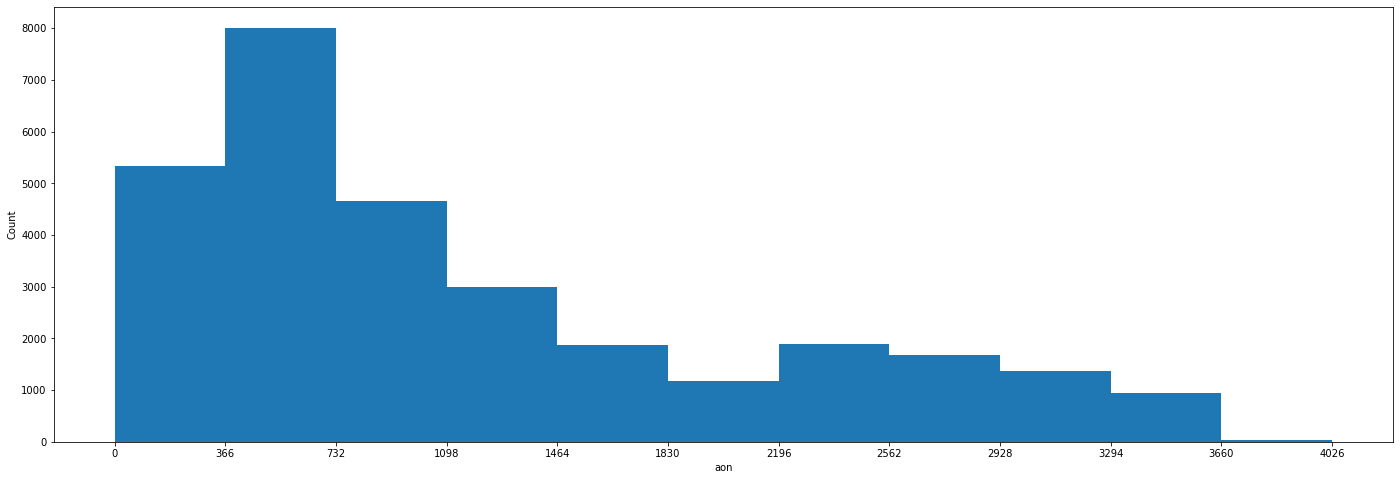

In [36]:
#Plot the age on Network for the high networth customer
plot_histogram(high_value_customers, "aon", 366)

##### We find that most of the customers are in the network between 1 to 2 years

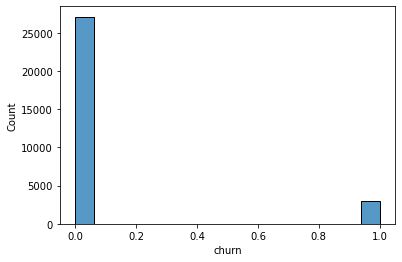

In [37]:
sns.histplot(high_value_customers["churn"])
plt.show()

In [38]:
numeric_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',  'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']
        

In [39]:
from matplotlib import pyplot
def box_plot(x,ys):
    i = 0
    fig, axes = pyplot.subplots(ncols=3, figsize=(15, 12))
    for y in ys:
        sns.boxplot(x=x, y=y, data=high_value_customers, orient='v', ax = axes[i], hue = "churn")
        i = i + 1
    plt.show()

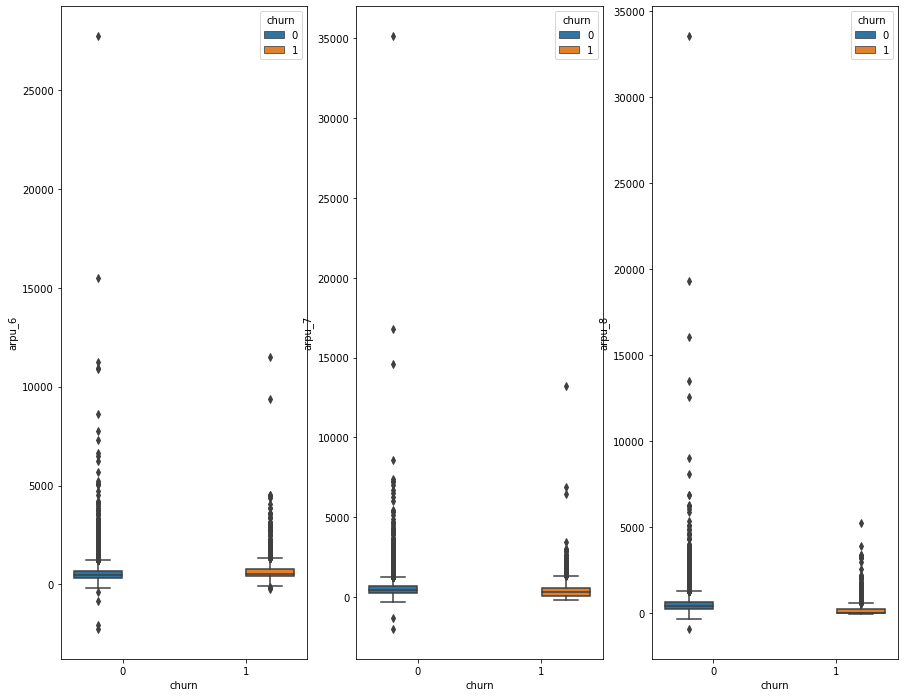

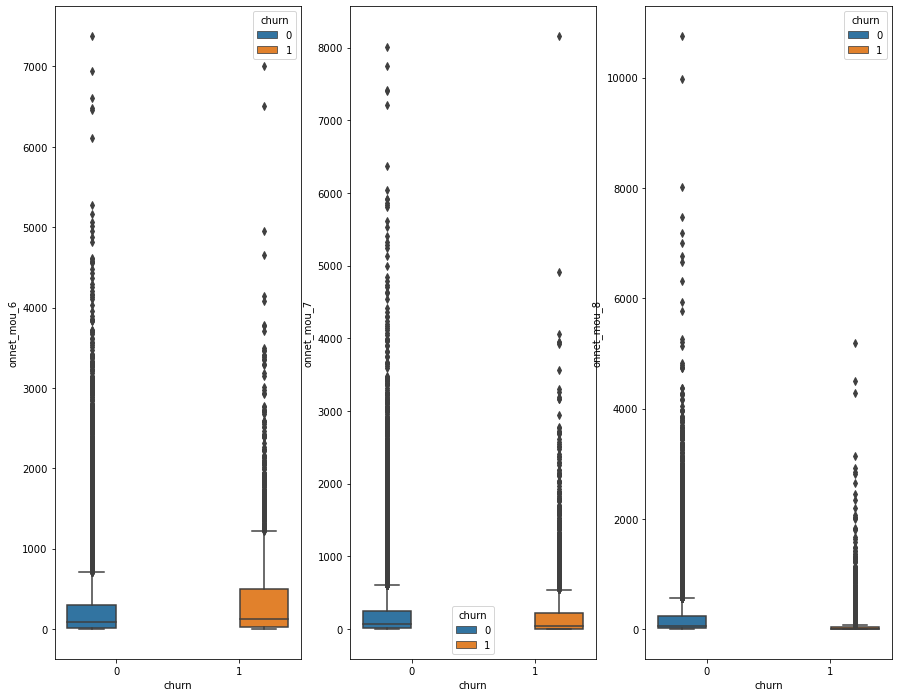

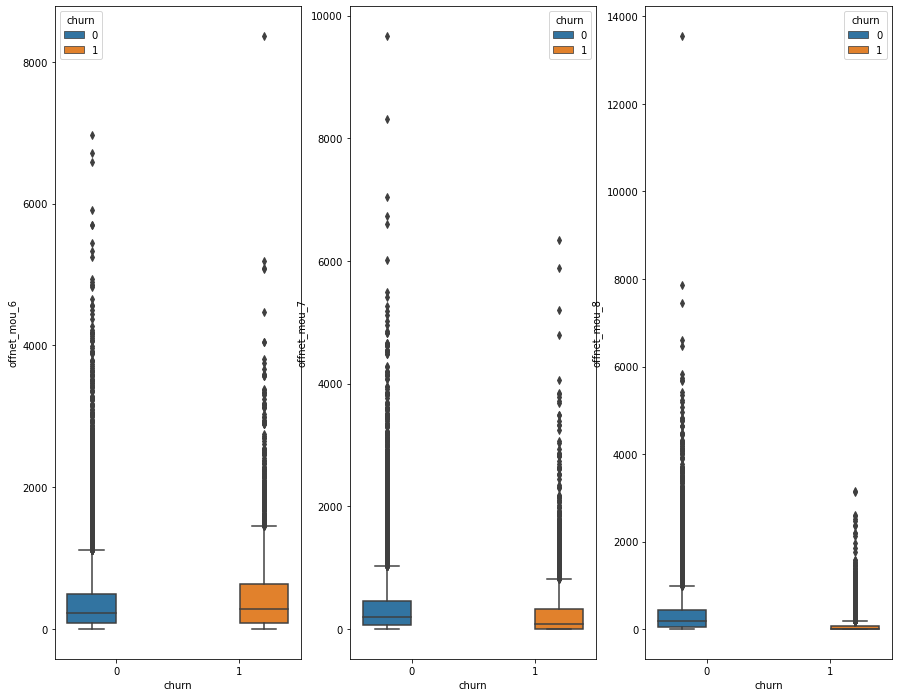

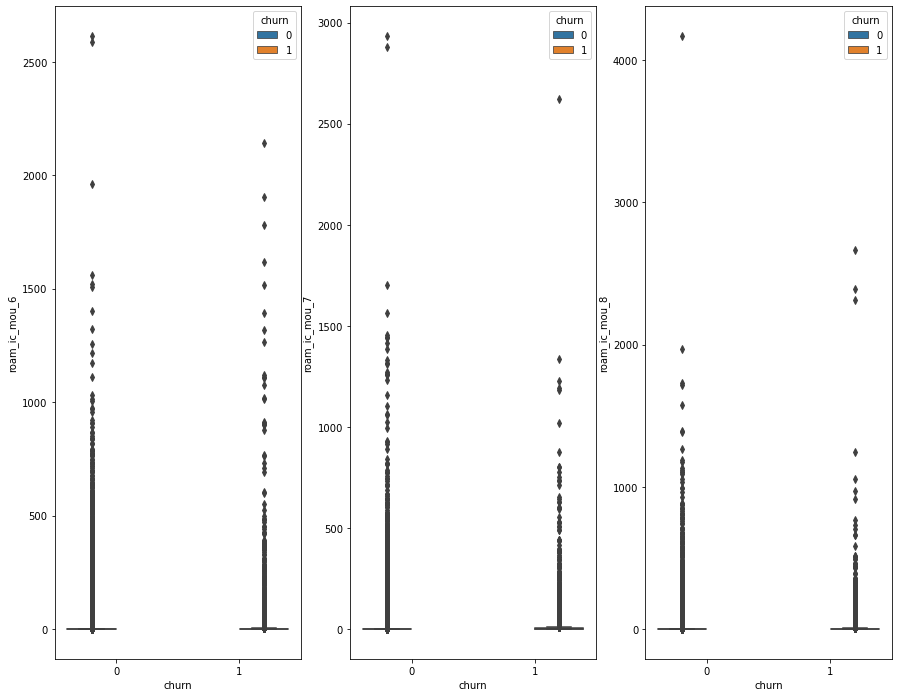

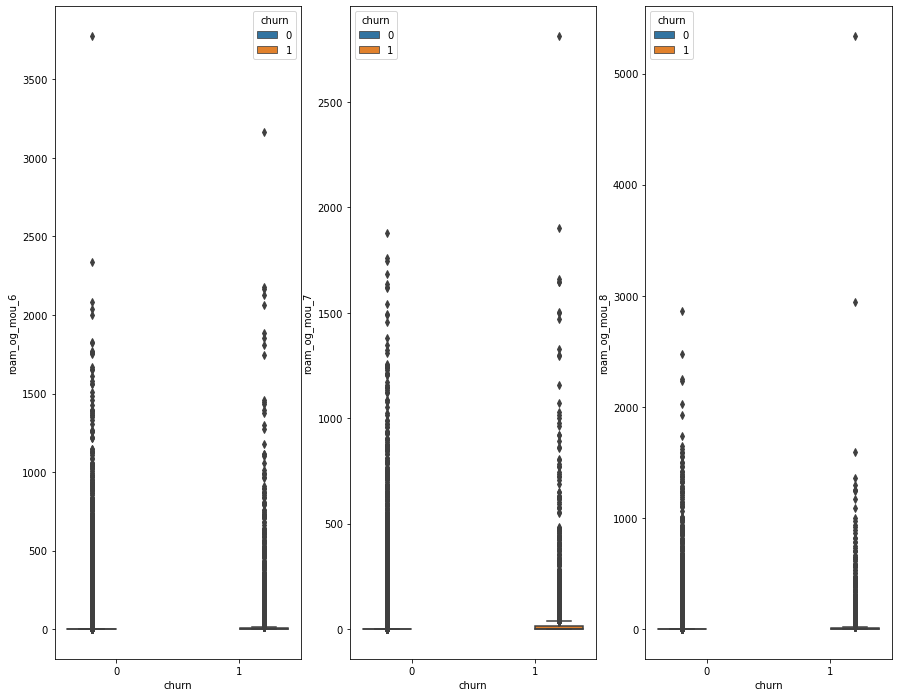

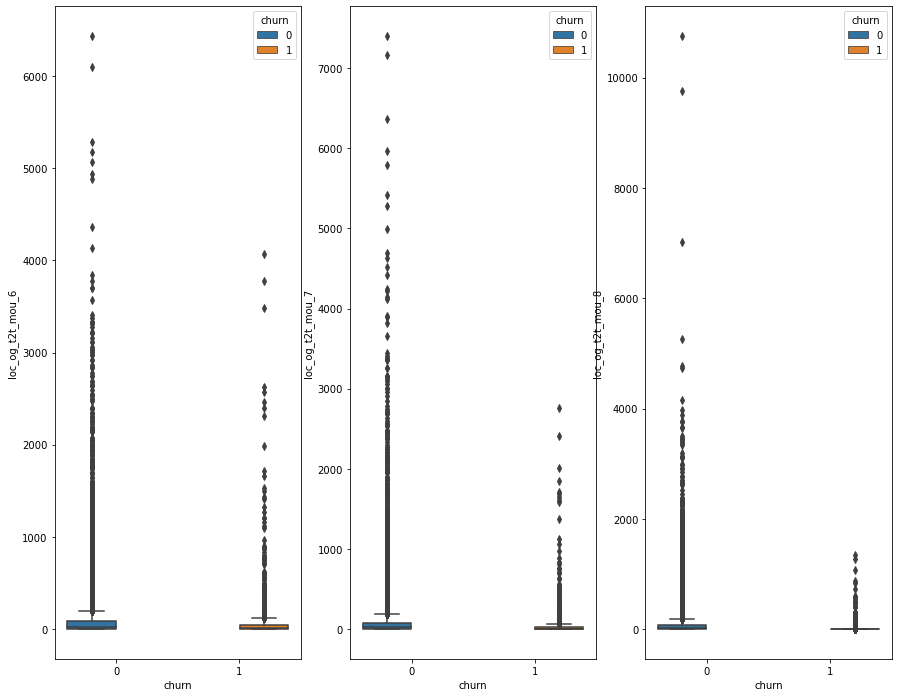

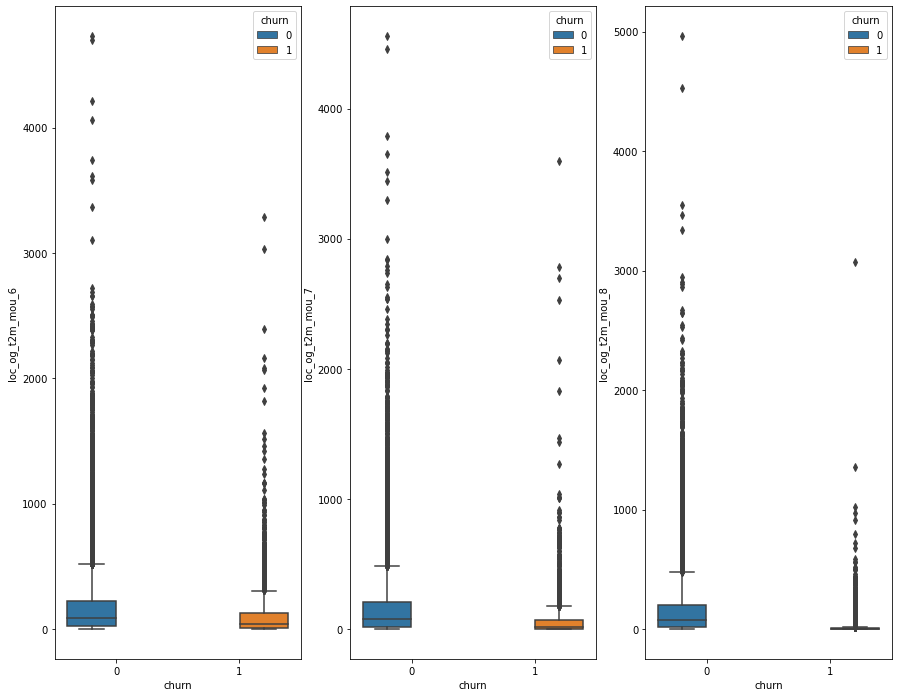

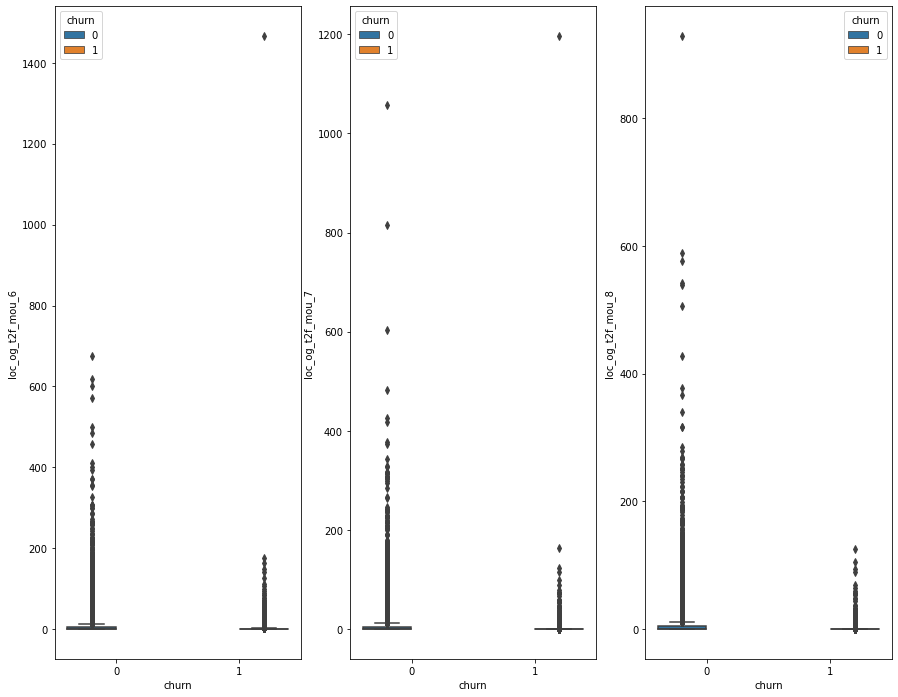

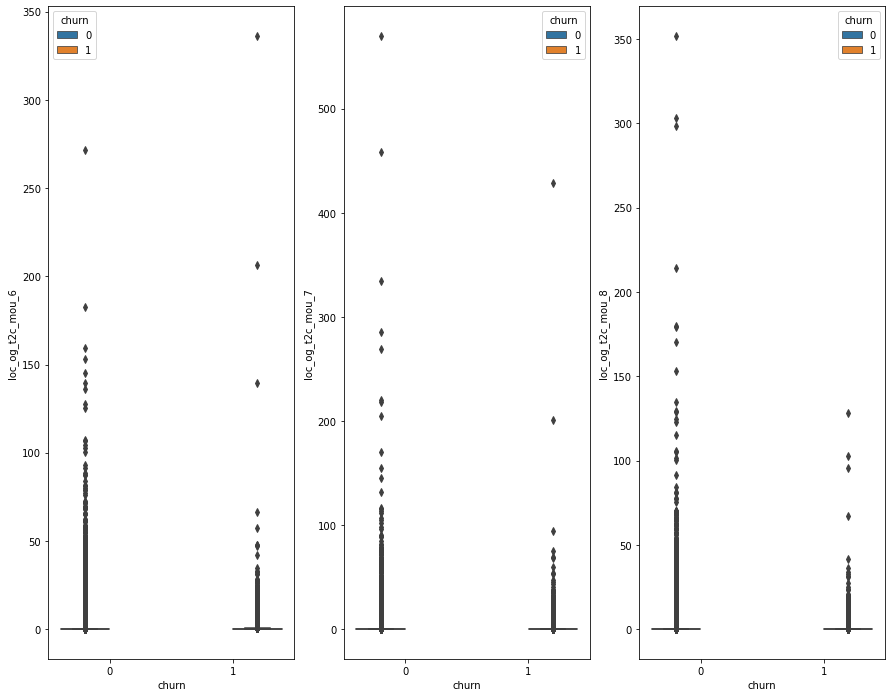

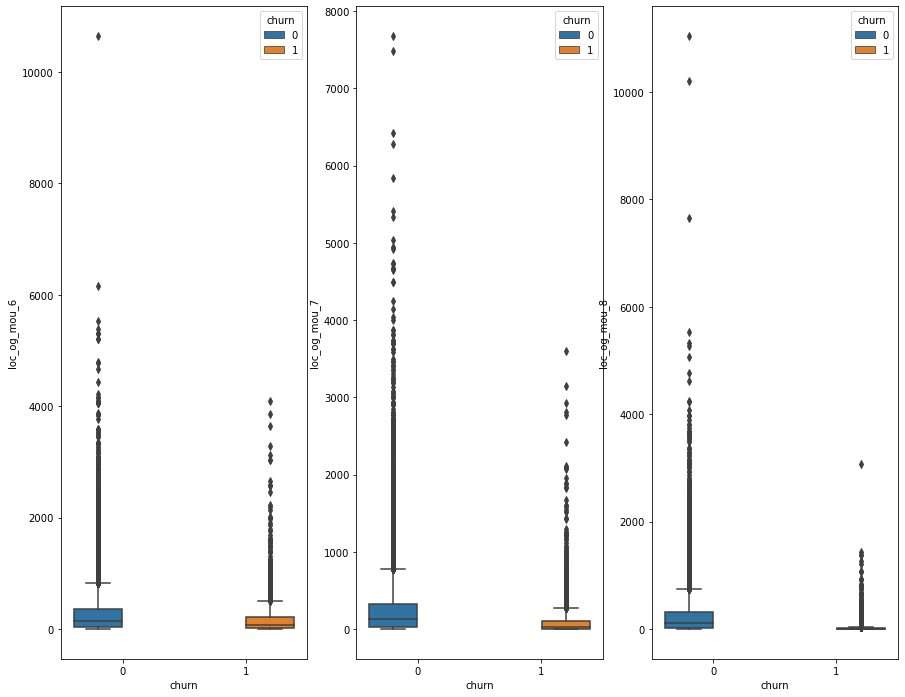

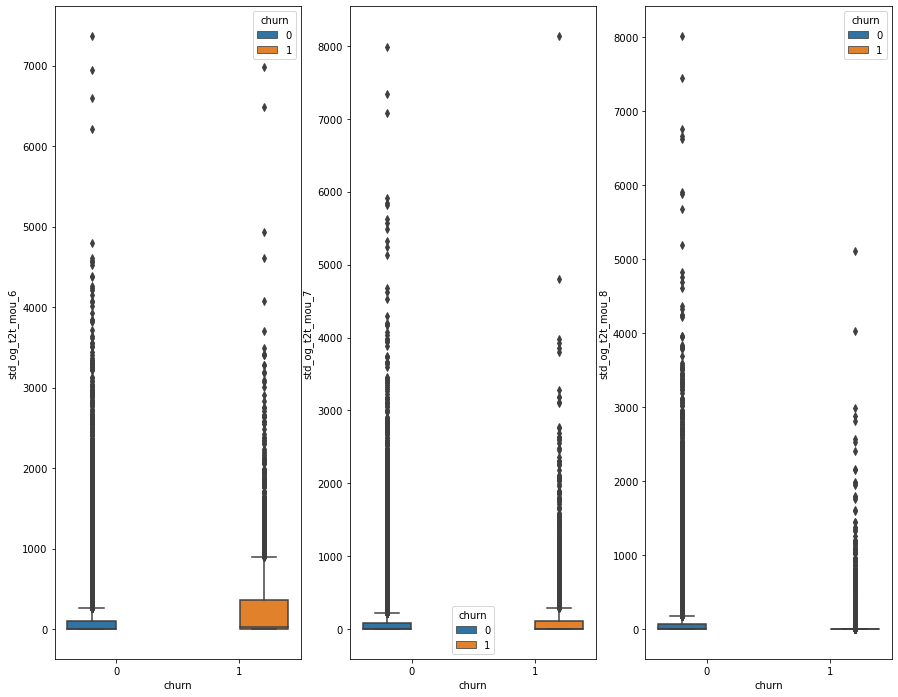

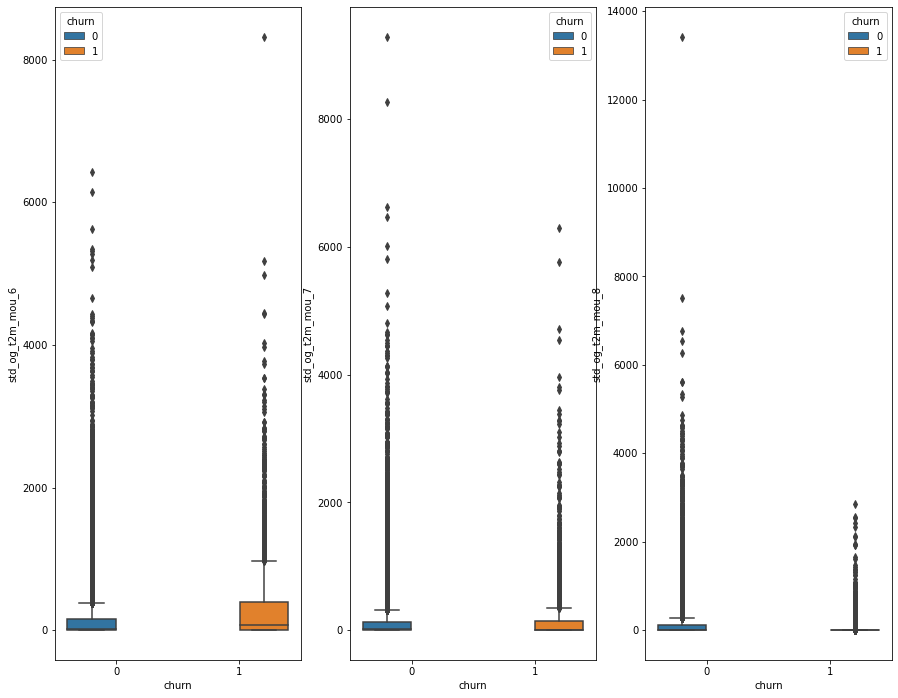

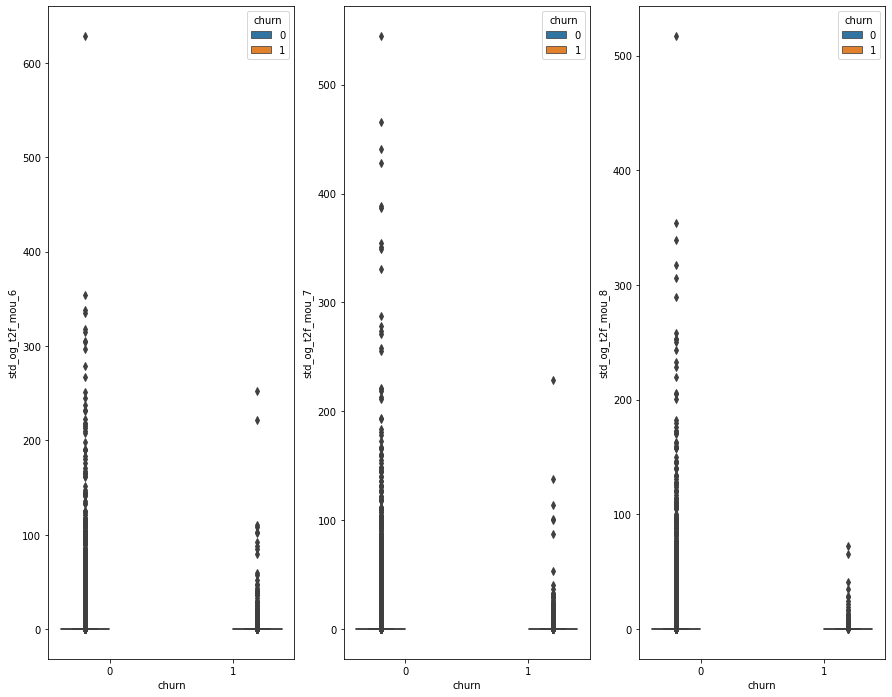

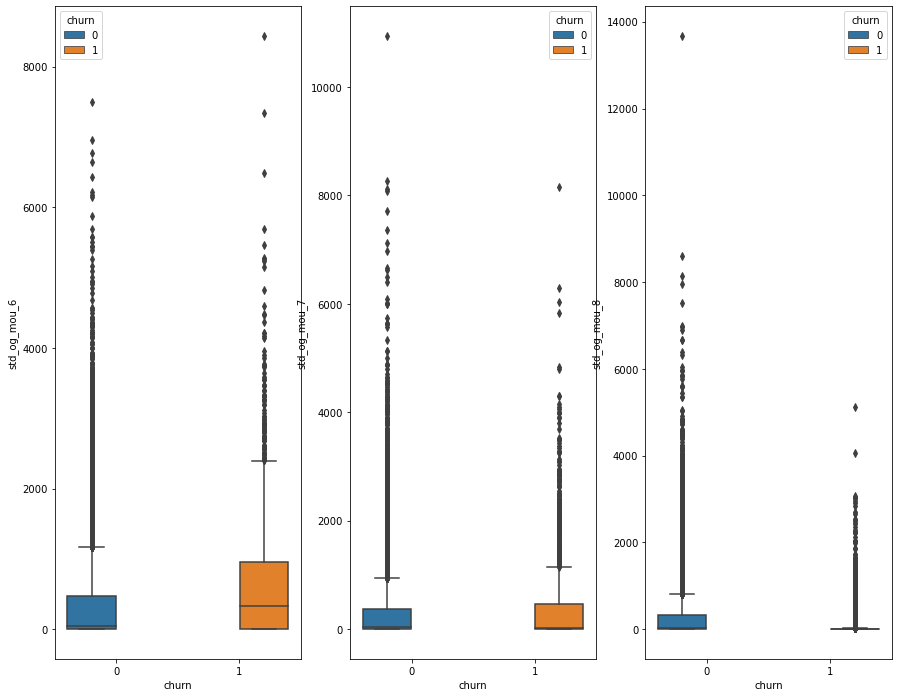

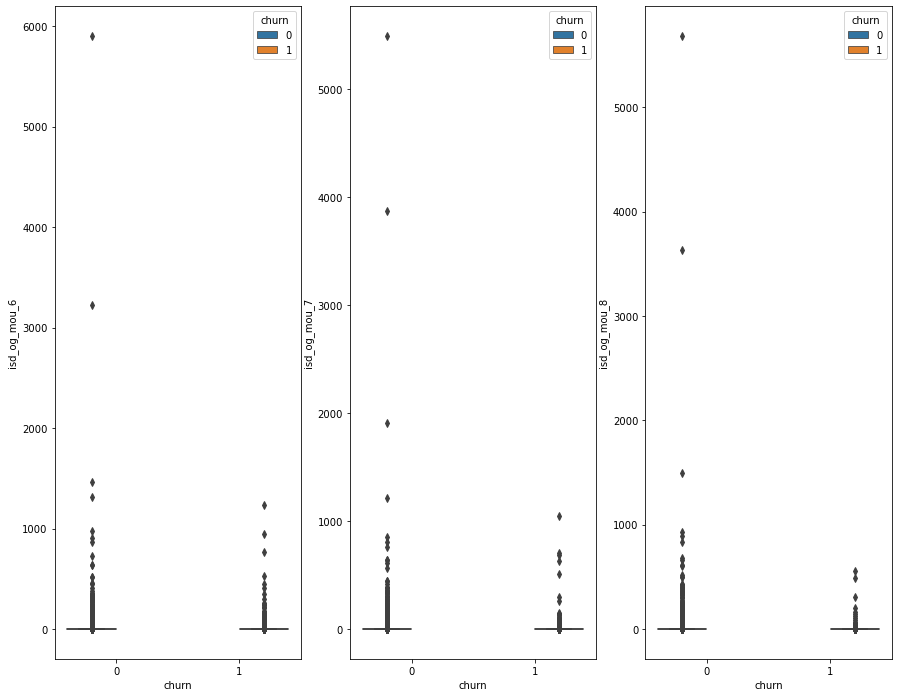

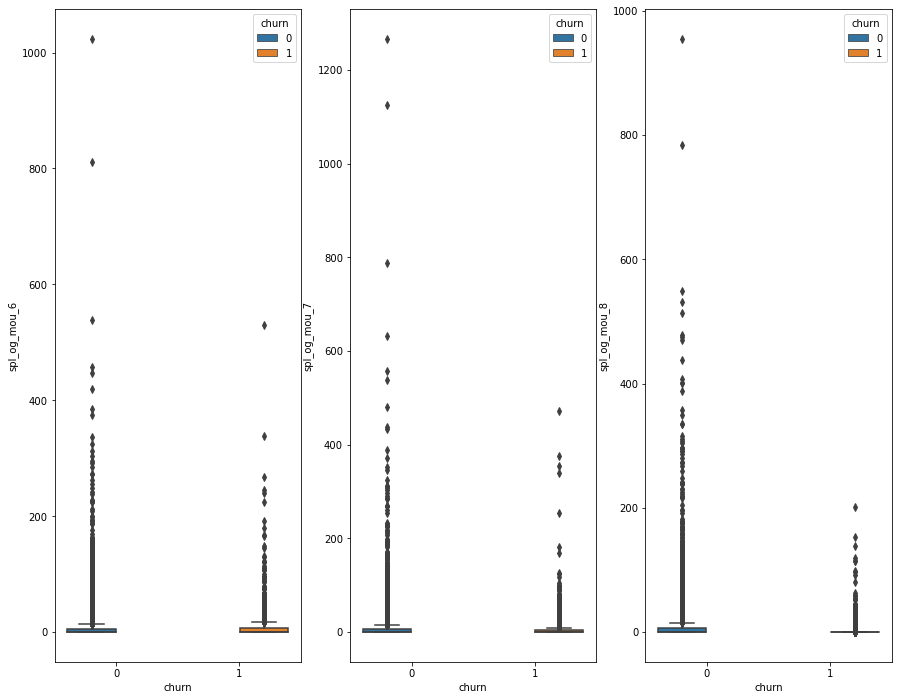

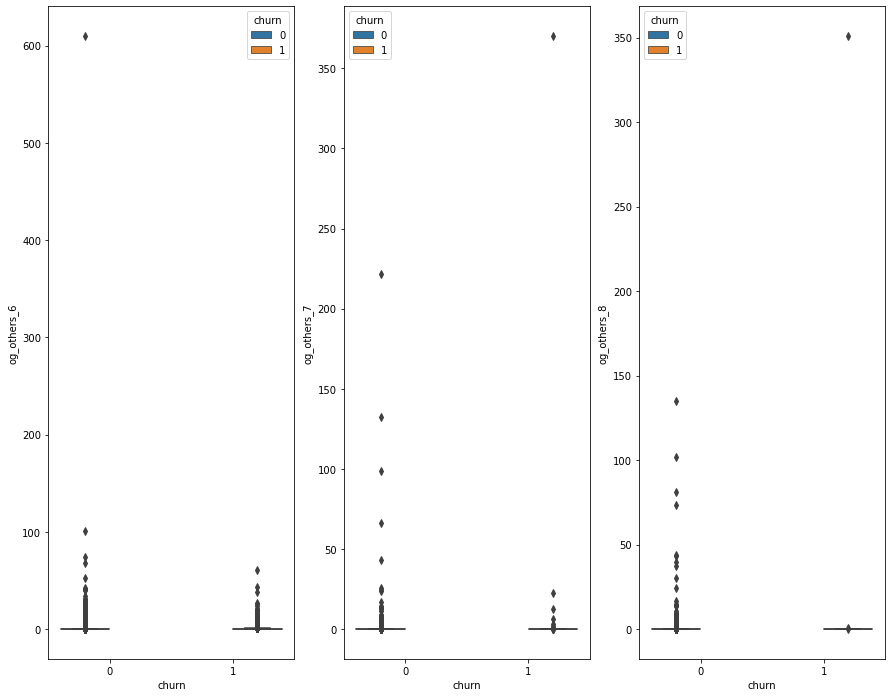

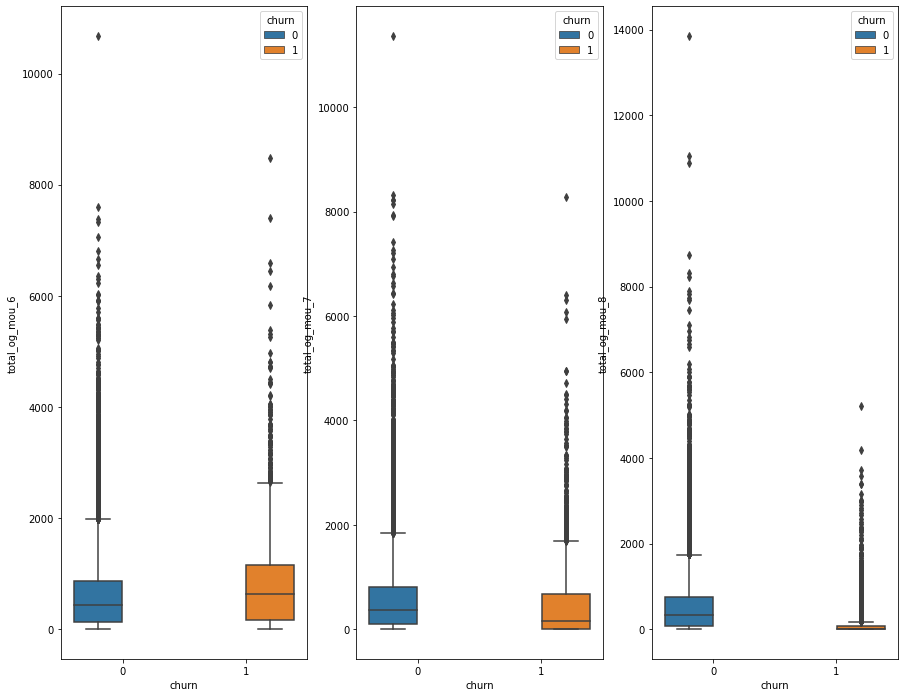

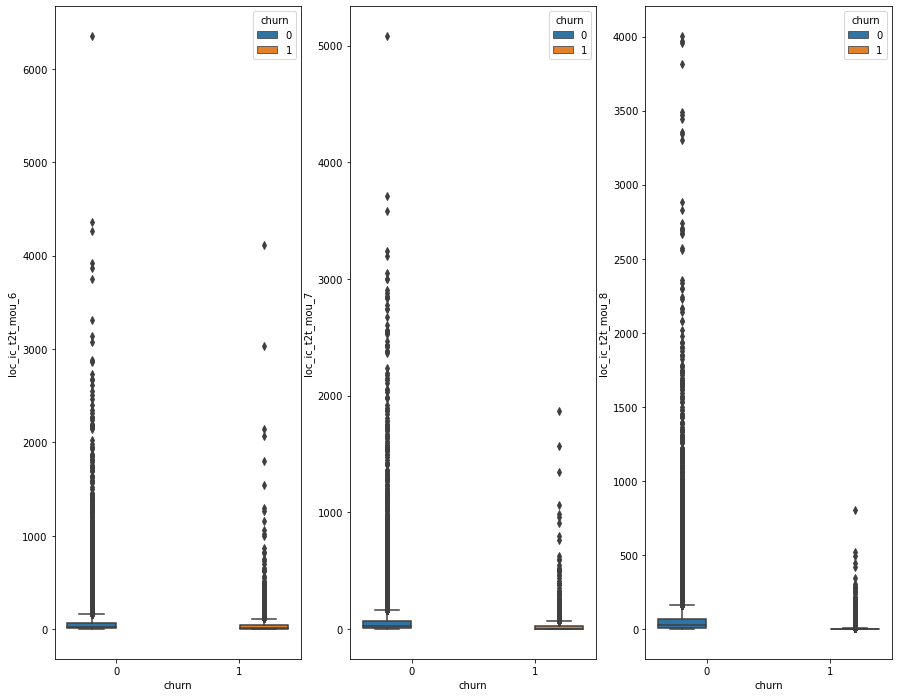

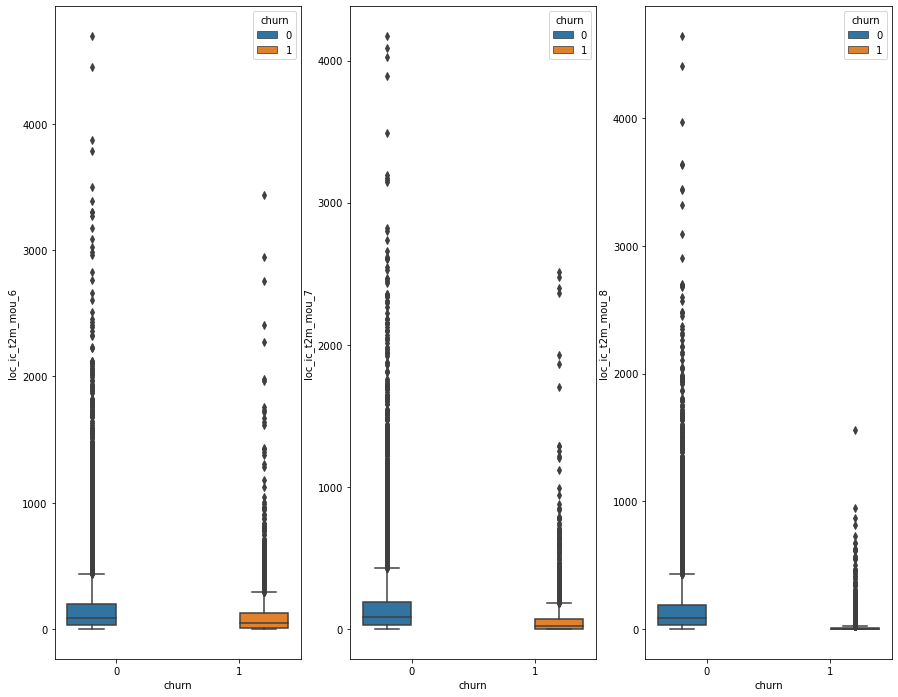

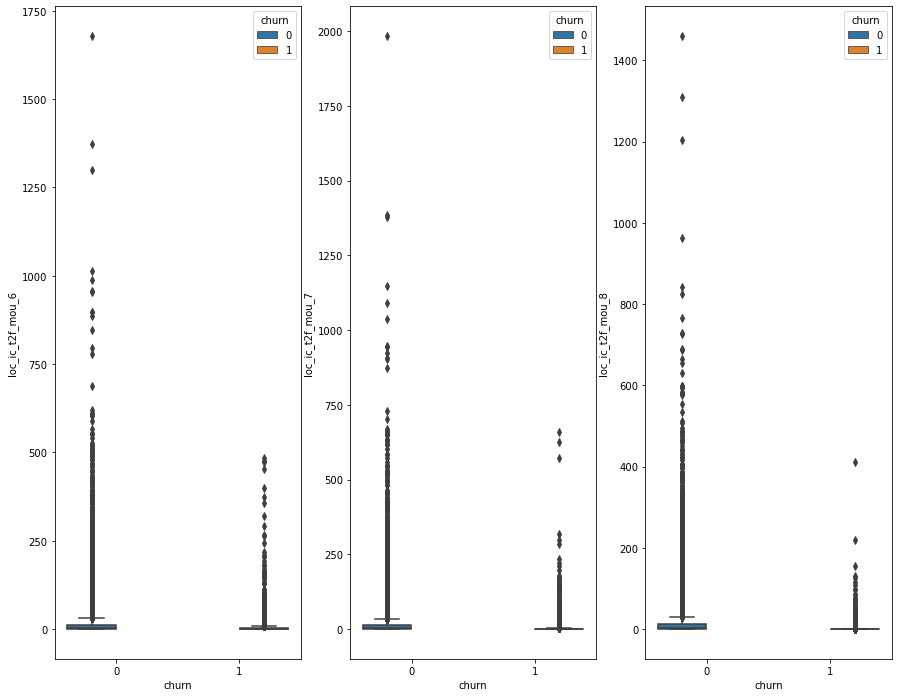

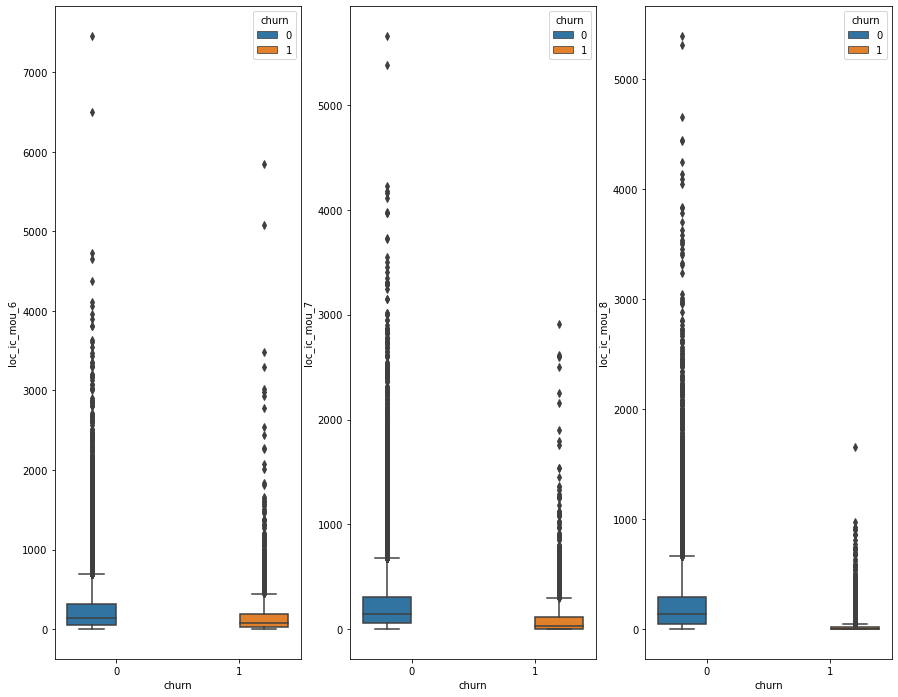

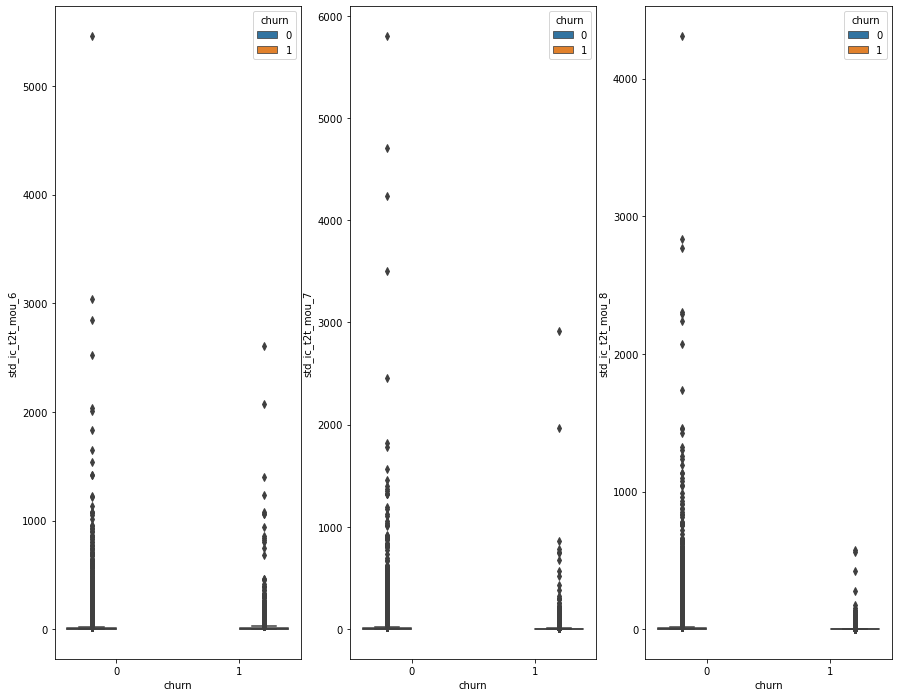

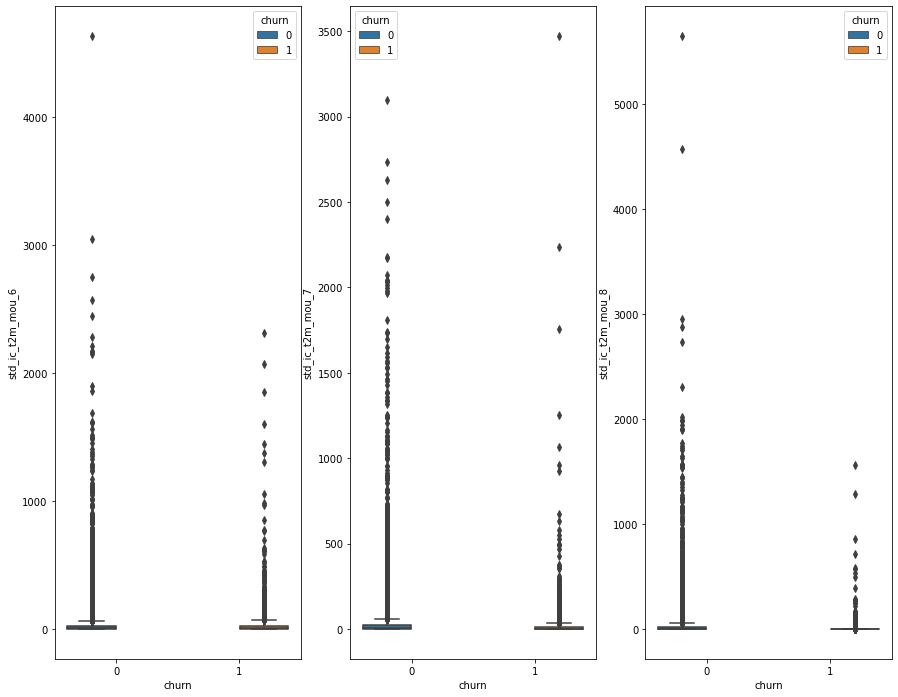

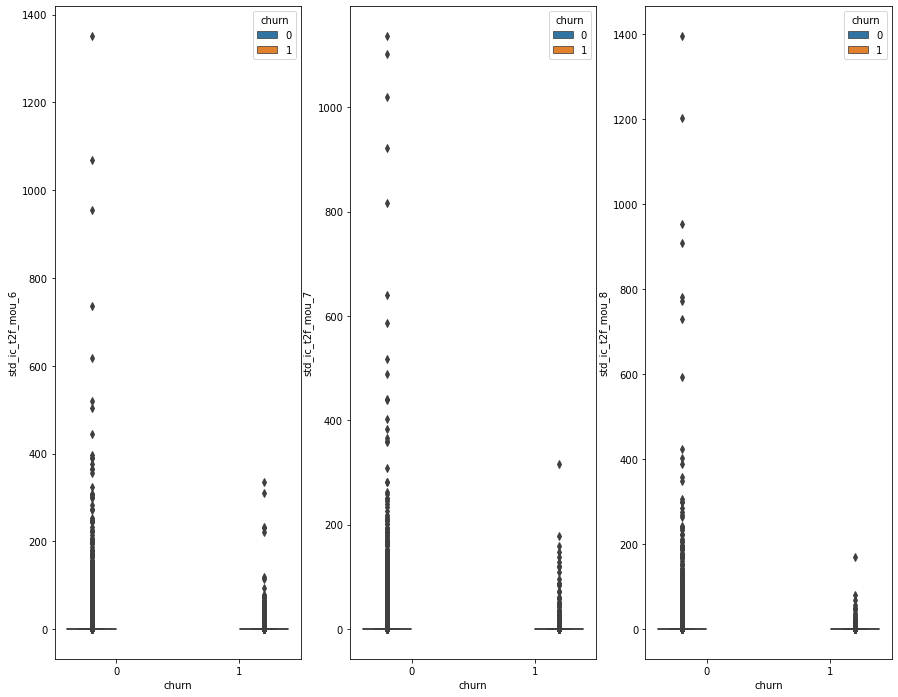

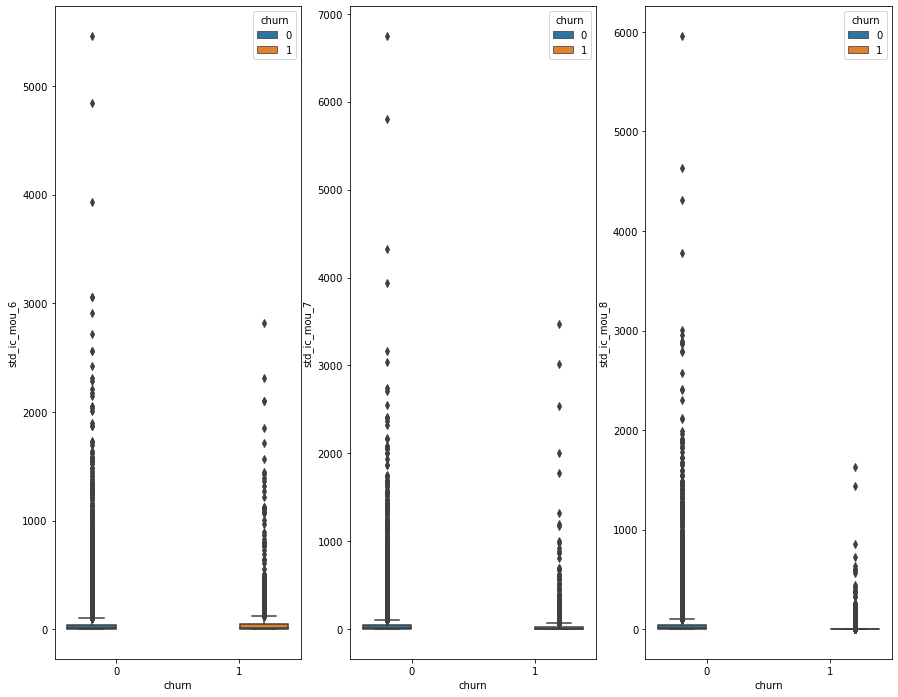

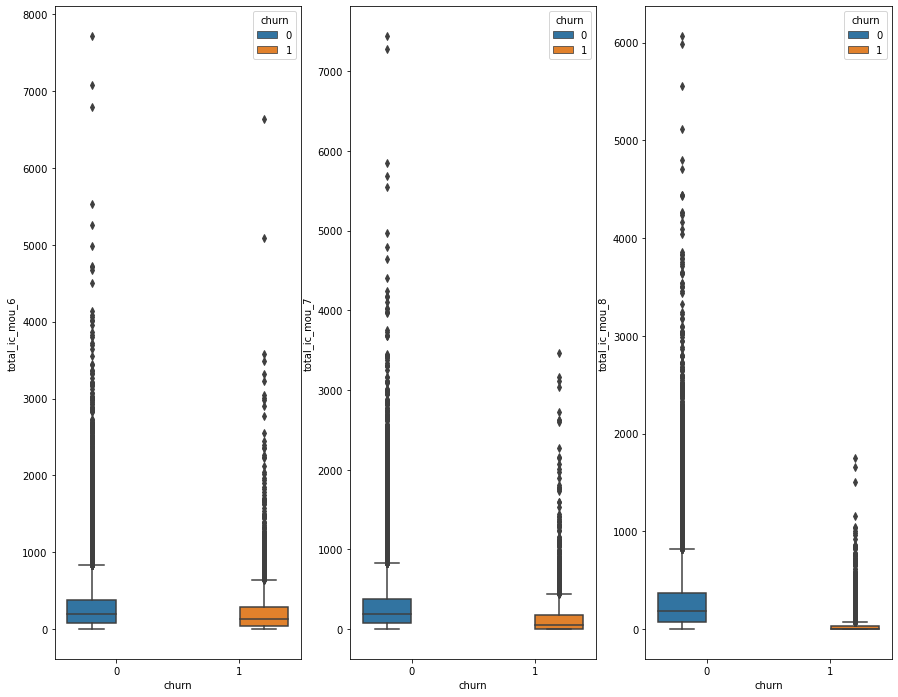

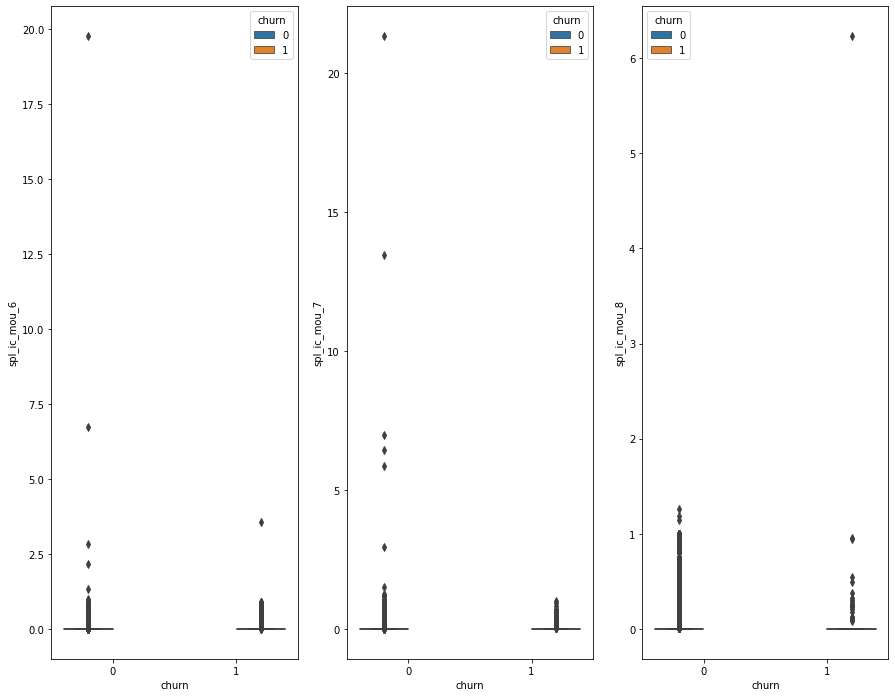

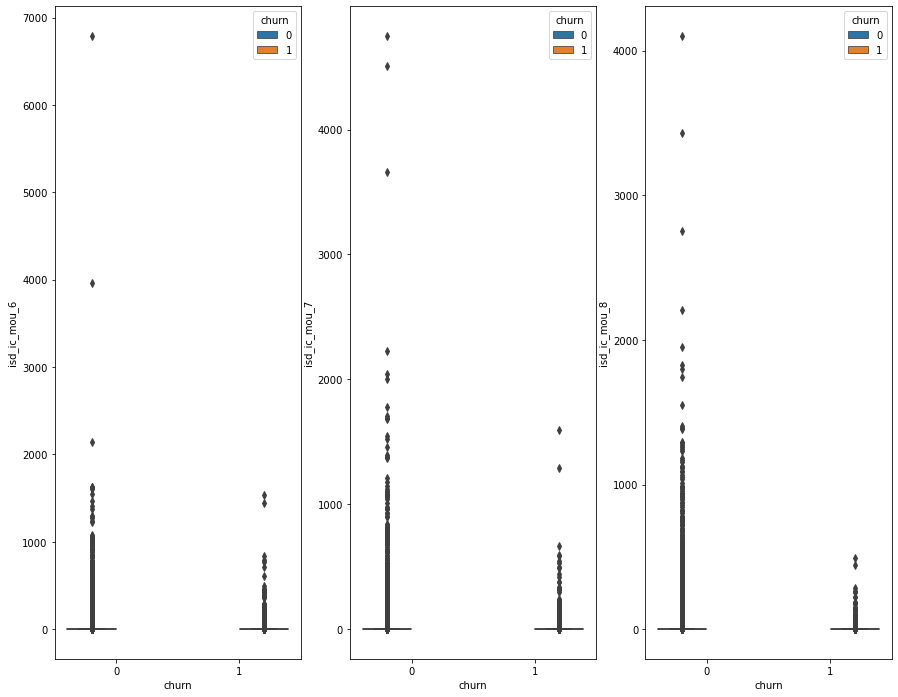

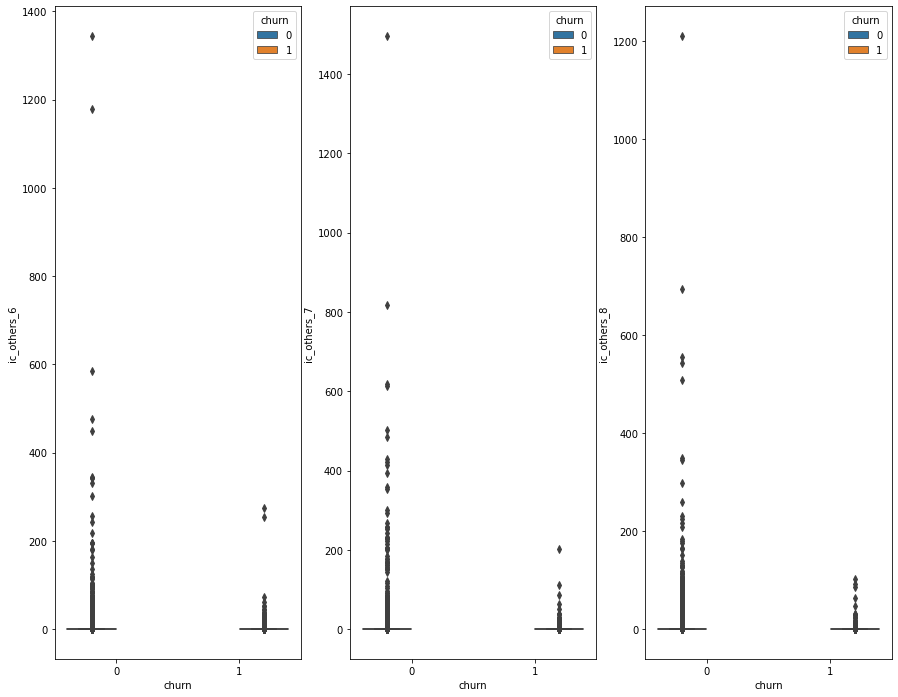

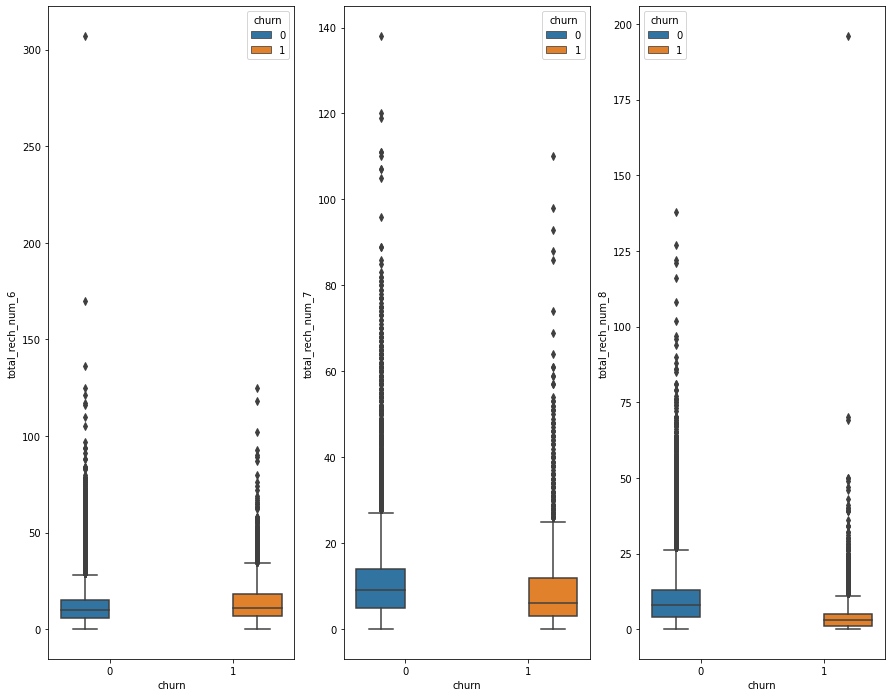

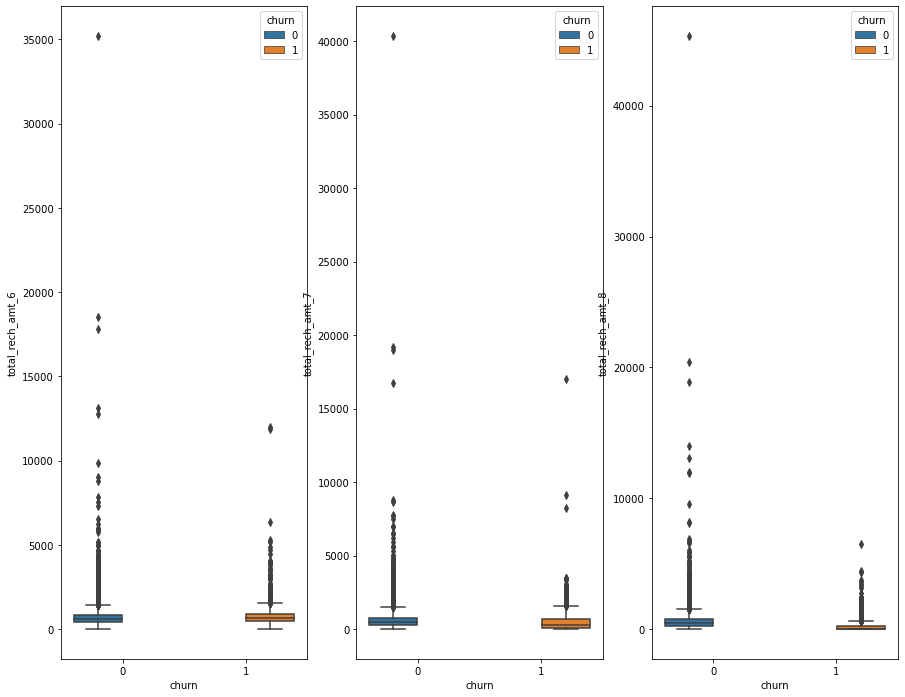

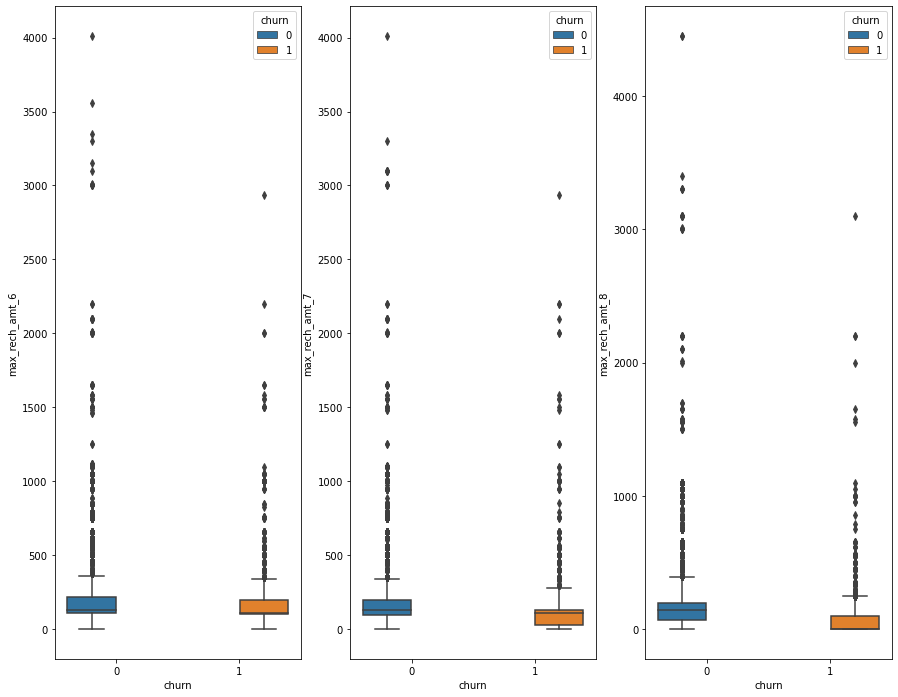

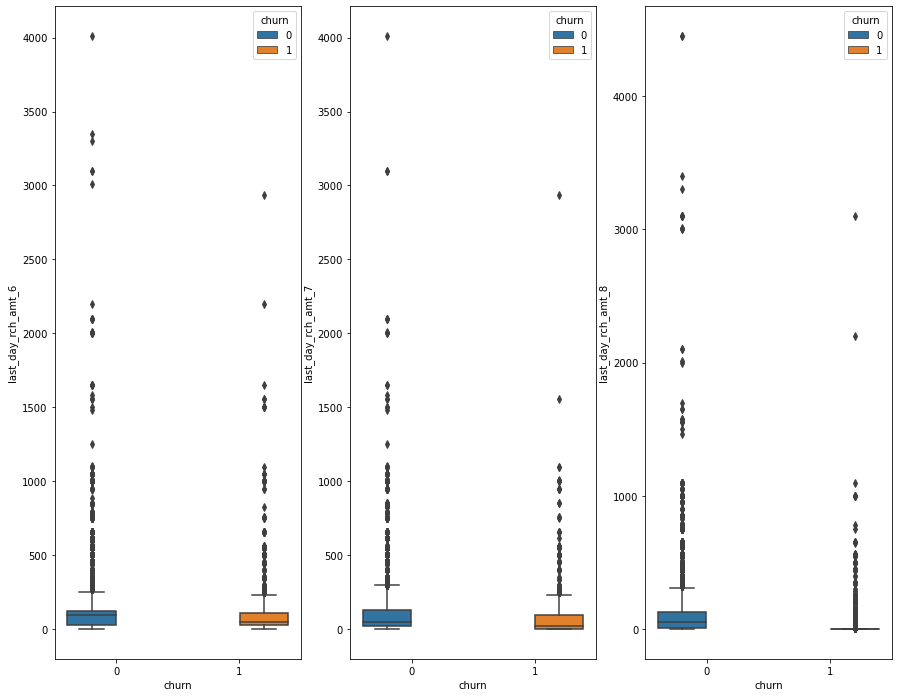

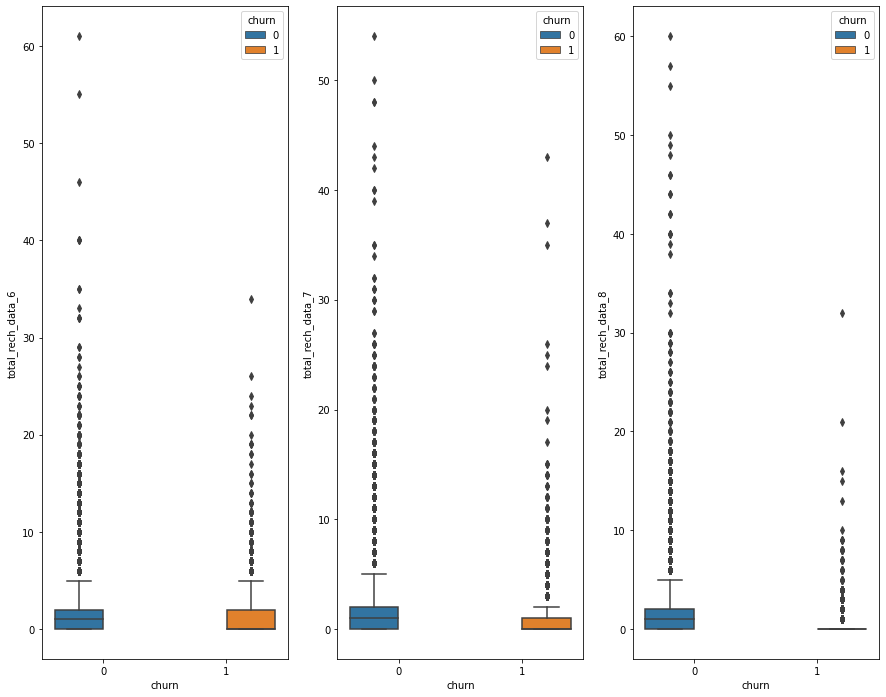

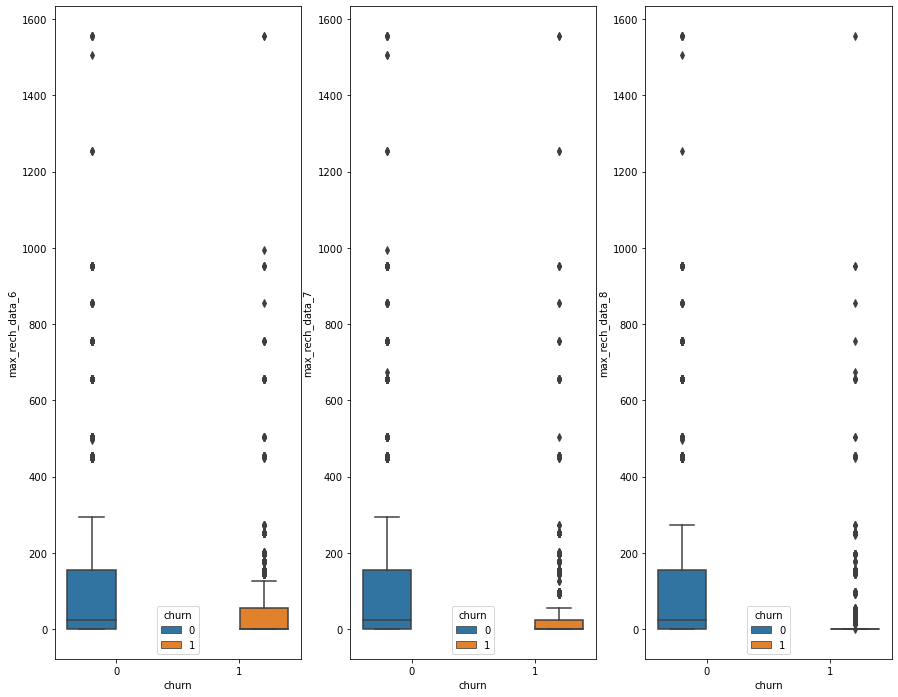

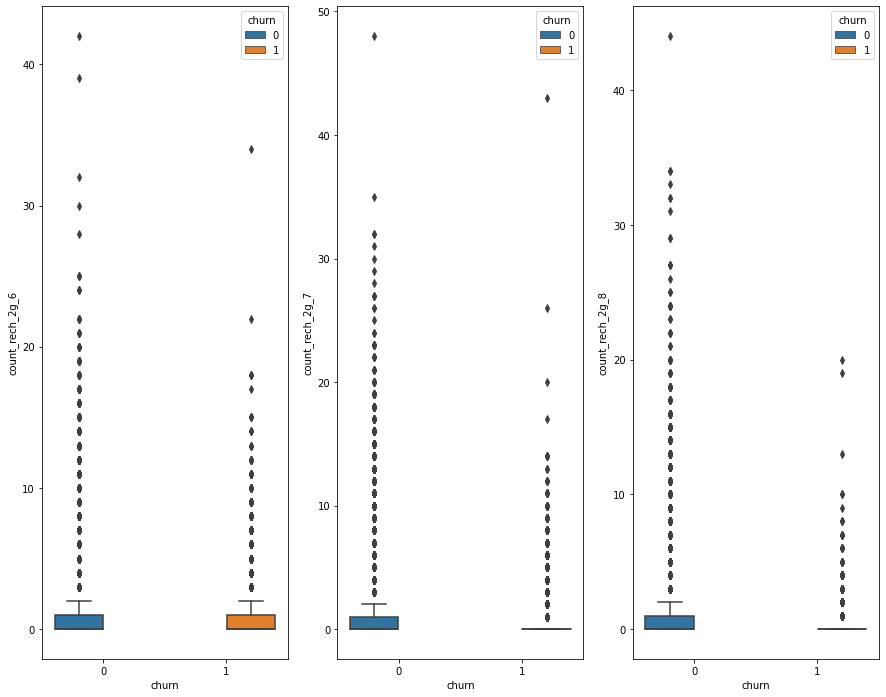

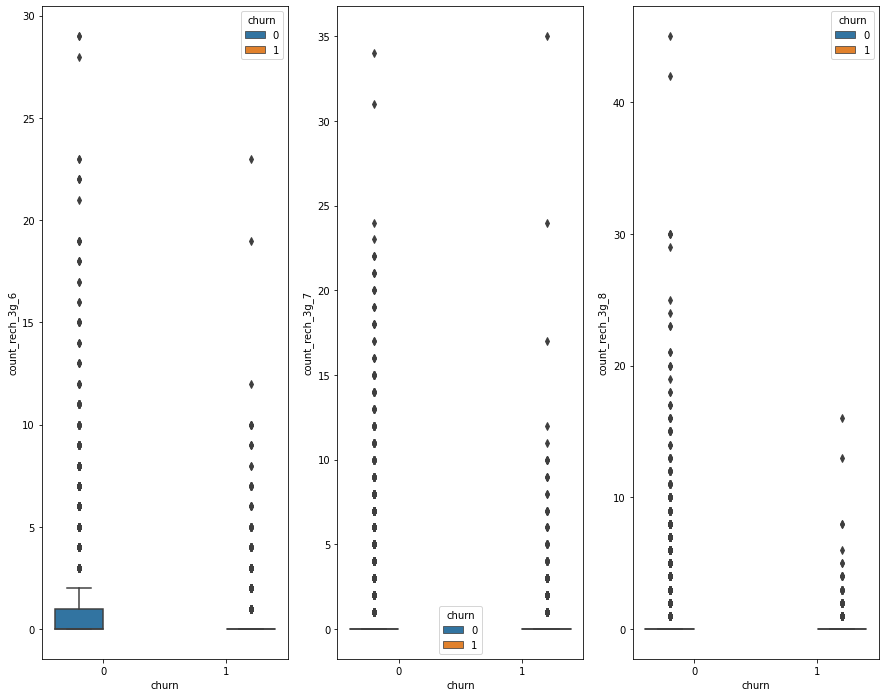

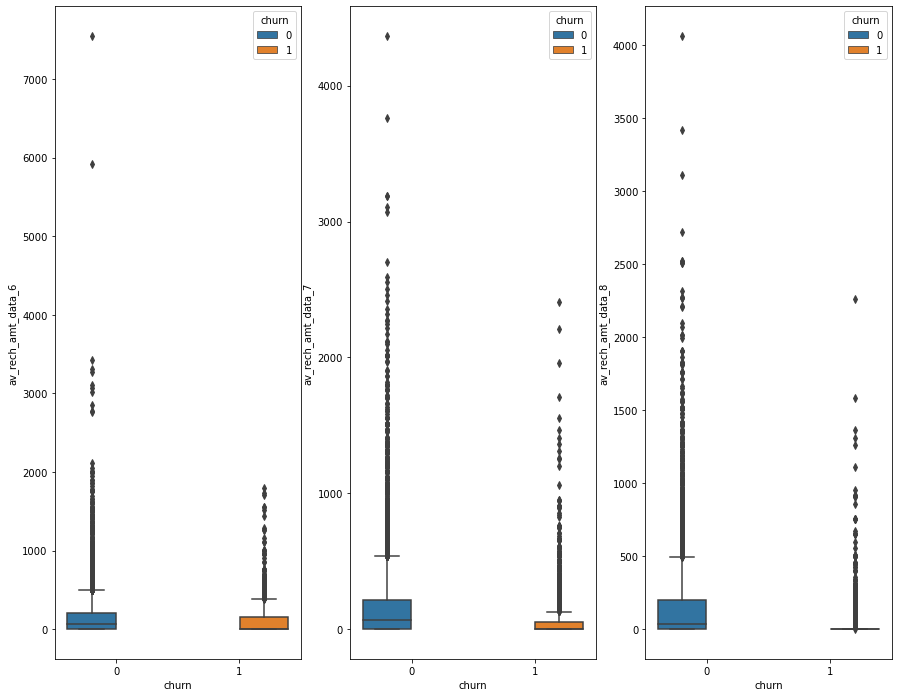

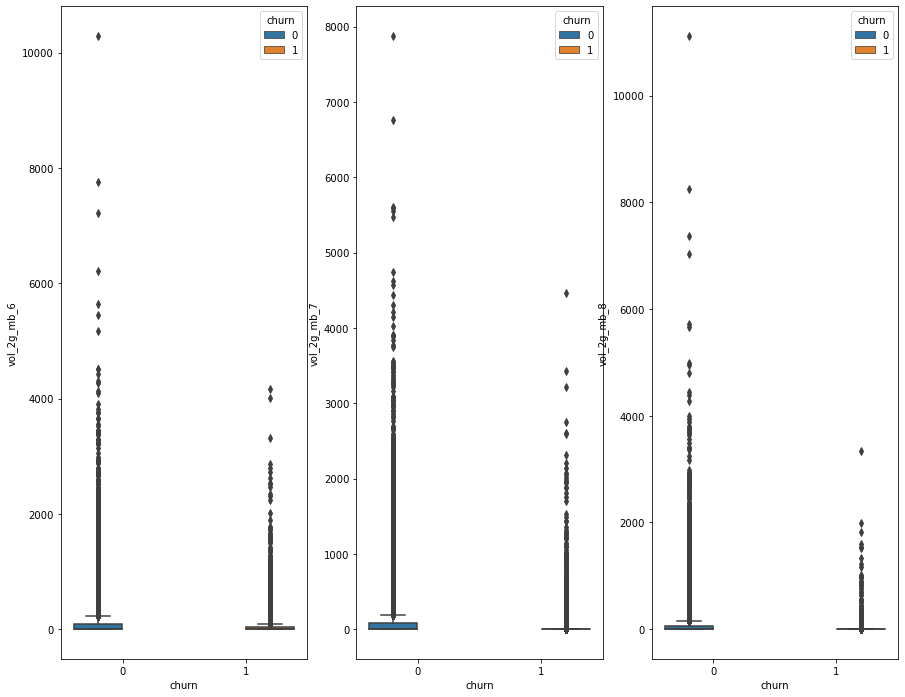

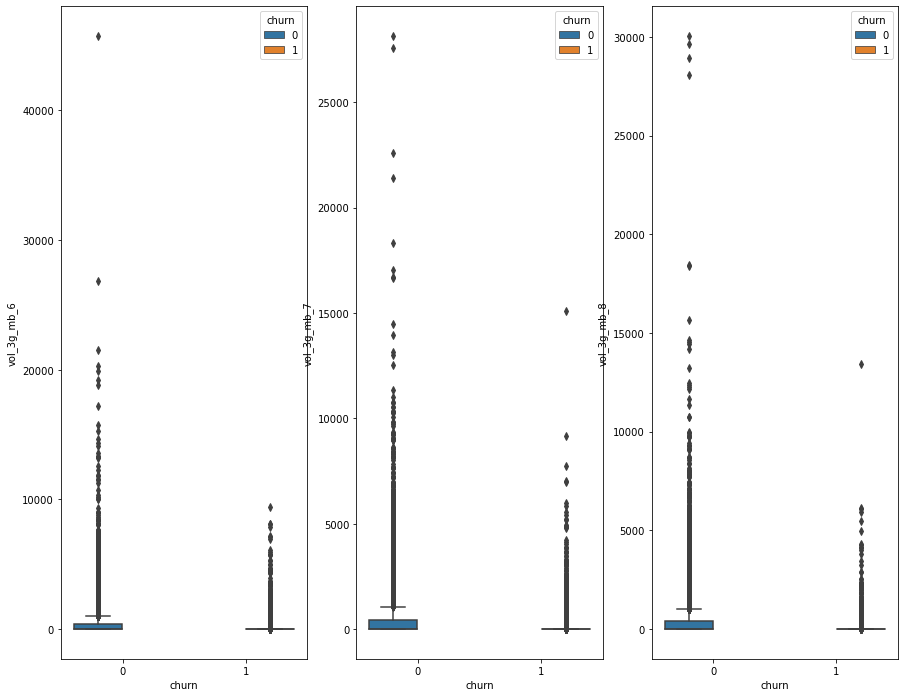

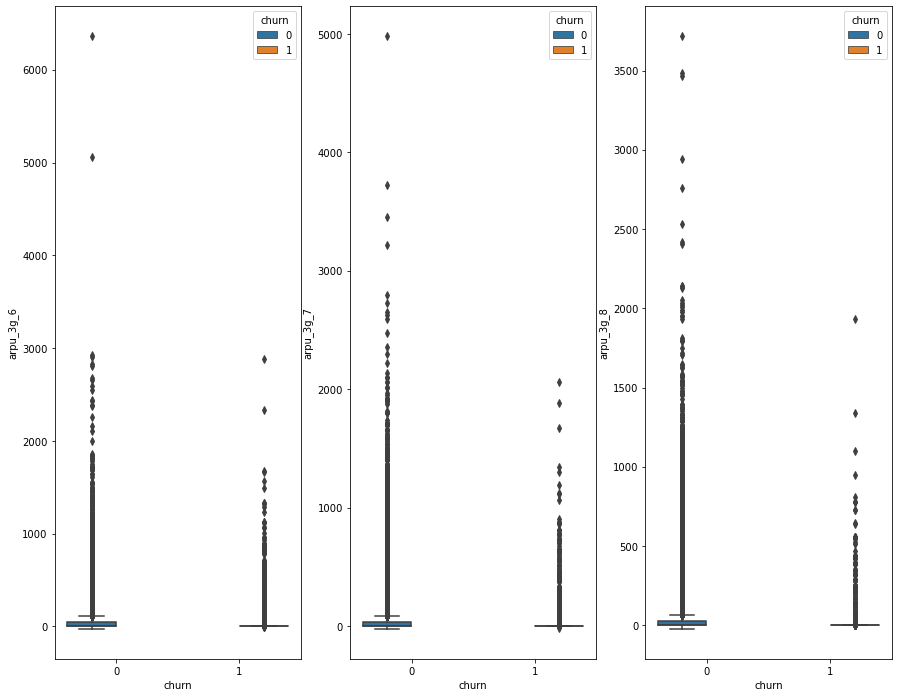

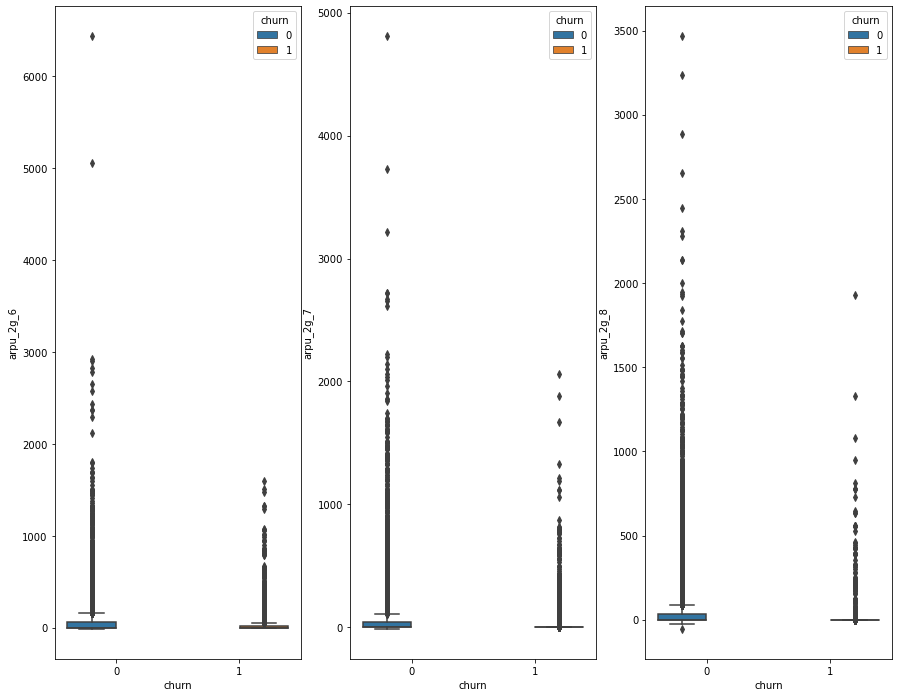

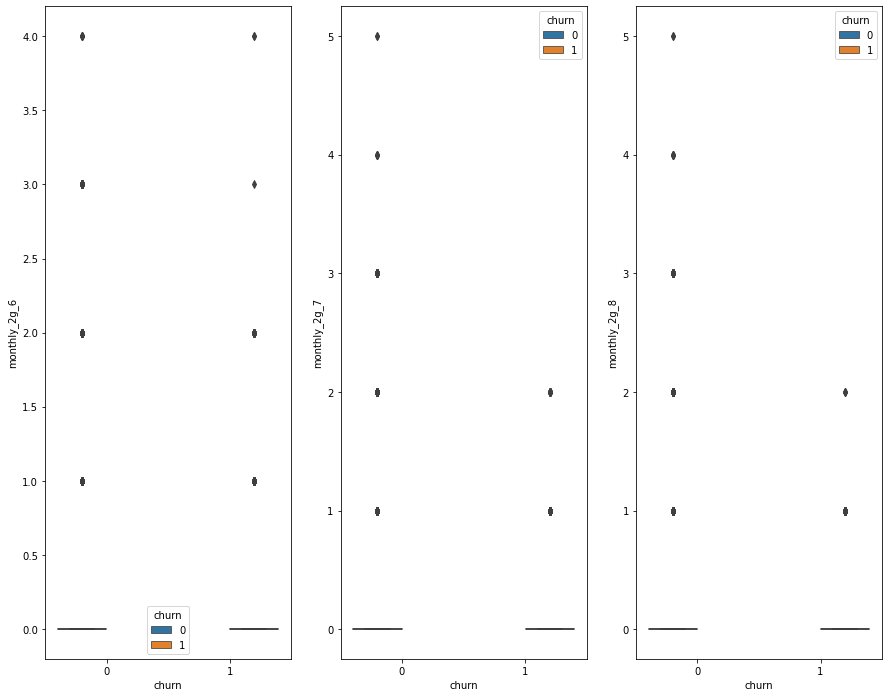

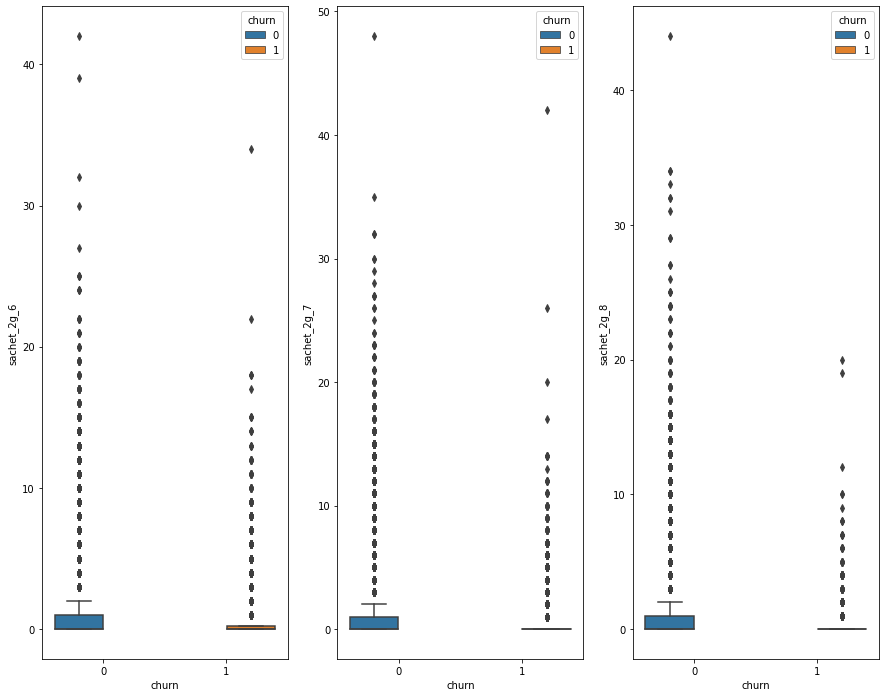

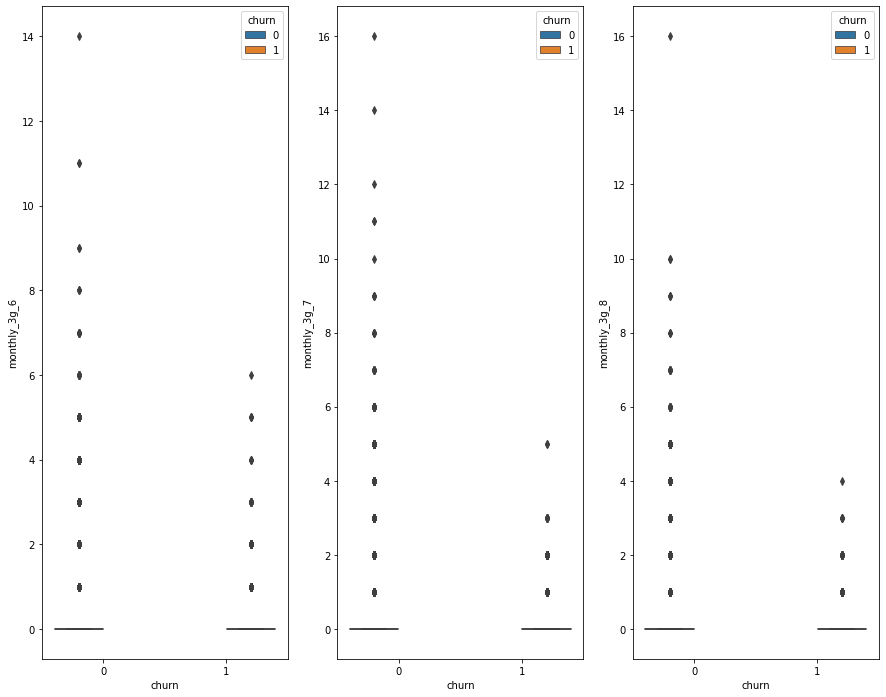

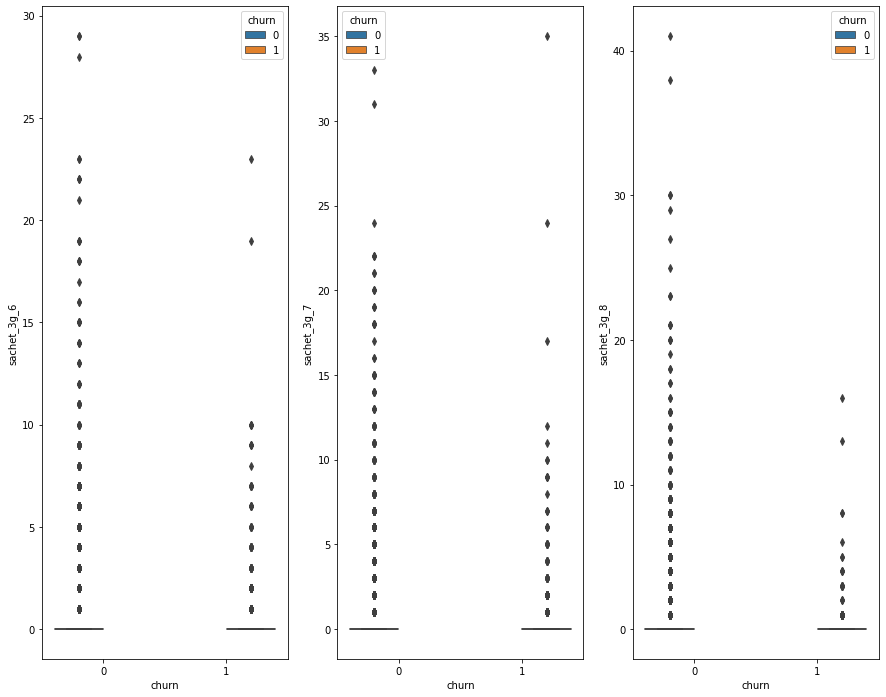

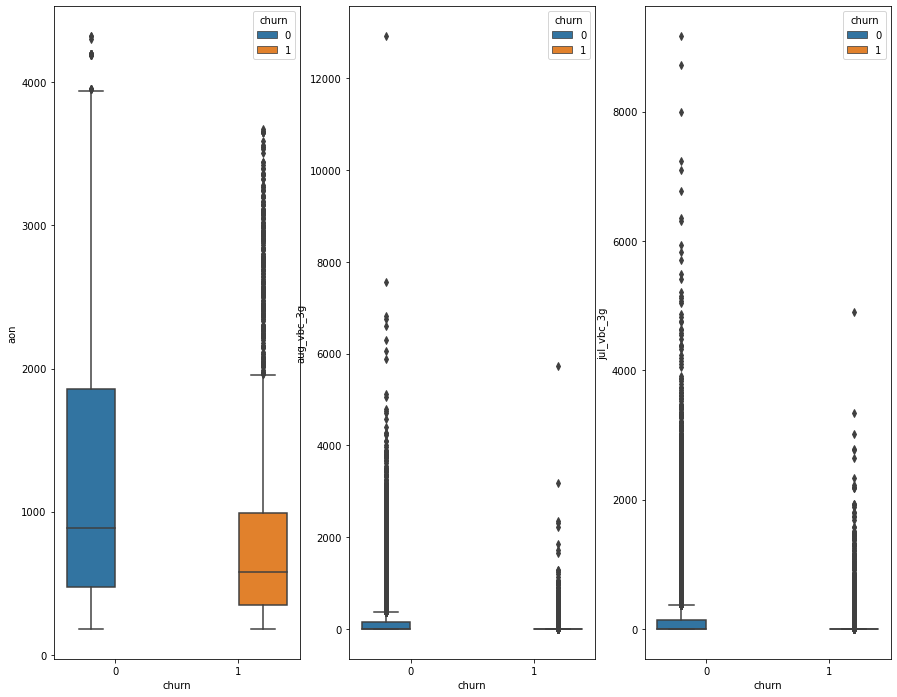

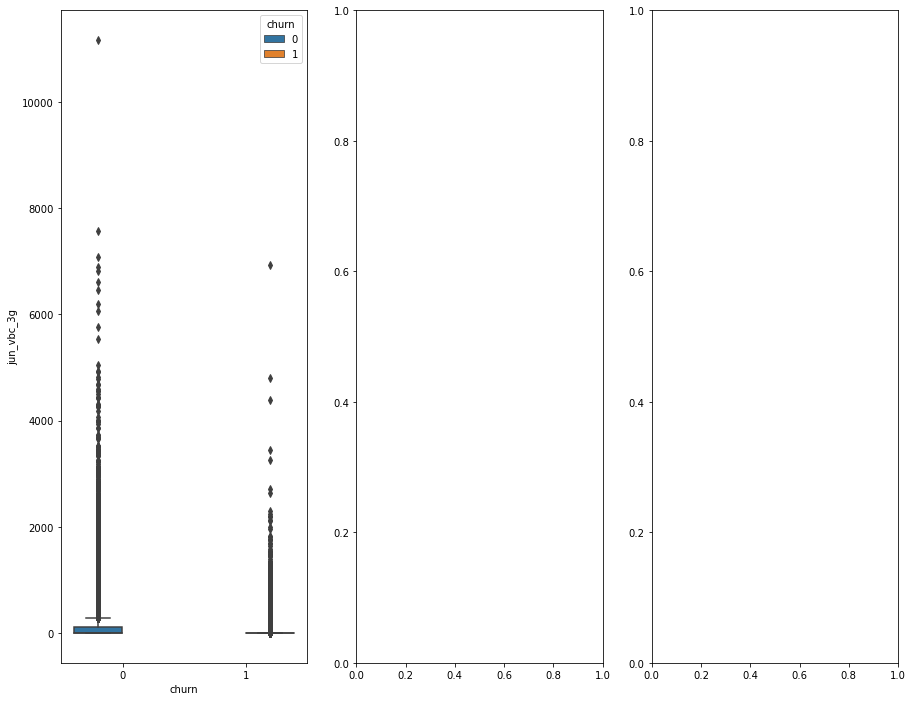

In [40]:
# Drawing the box plot to analyse the continuos or numeric variables
for i in range(0, len(numeric_cols), 3):
    box_plot("churn", numeric_cols[i:i+3])

#####  As you can see , there are outliers present in the data. We will handle them in the following sections

In [41]:
high_value_customers[["last_day_rch_amt_6","last_day_rch_amt_7","last_day_rch_amt_8"]]

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
0,252,252,252
6,37,24,10
7,0,0,779
8,50,0,10
13,110,50,0
...,...,...,...
99981,252,0,130
99984,0,25,25
99986,550,786,0
99997,202,179,179


In [42]:
def bar_plot_median(aggregation_values, title):
    median_values = high_value_customers.groupby(['churn'])[aggregation_values].median()
    median_values.plot.bar(title = title)
    plt.show()

def bar_plot_mean(aggregation_values, title):
    mean_values = high_value_customers.groupby(['churn'])[aggregation_values].mean()
    mean_values.plot.bar(title = title)
    plt.show()

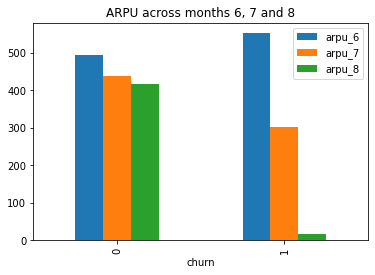

In [43]:
# Plotting a bar plot for 6, 7 and 8 months for arpu
aggregation_values = ['arpu_6', 'arpu_7', 'arpu_8']
bar_plot_median( aggregation_values, 'ARPU across months 6, 7 and 8')

If there is a wild swing in ARPU betweenn 6, 7 and 8, there are more chances of a customer churning. We should do furthe analysis on what triggered the high ARPU in the month of 6.
The drop in ARPU in the month of 7 is a significant attribute that determines the churn

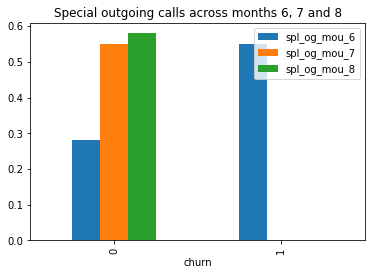

In [44]:
# Plotting a bar plot for 6, 7 and 8 months for special outgoing calls
aggregation_values = ['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8']
bar_plot_median( aggregation_values, 'Special outgoing calls across months 6, 7 and 8')

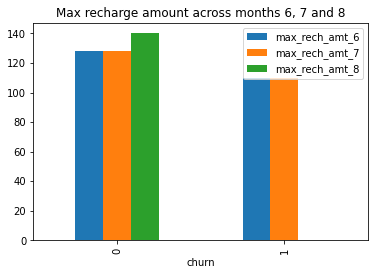

In [45]:
# Plotting a bar plot for 6, 7 and 8 months for max recharge amount
aggregation_values = ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']
bar_plot_median( aggregation_values, 'Max recharge amount across months 6, 7 and 8')

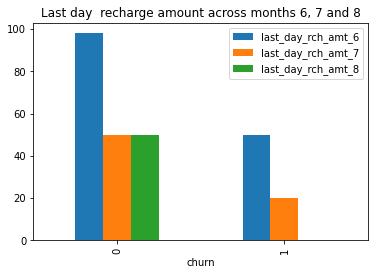

In [46]:
# Plotting a bar plot for 6, 7 and 8 months for last day recharge amount
aggregation_values = ['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']
bar_plot_median( aggregation_values, 'Last day  recharge amount across months 6, 7 and 8')

The last day recharge amount is low for the customers who churned.

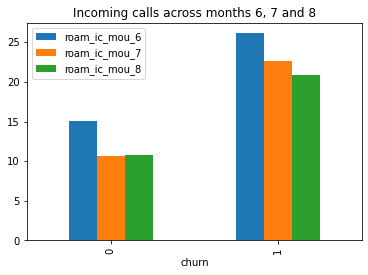

In [47]:
# Plotting a bar plot for 6, 7 and 8 months for incoming calls
aggregation_values = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8']
bar_plot_mean( aggregation_values, 'Incoming calls across months 6, 7 and 8')


If the average incoming calls for the customer is very high, the customers are likely to churn

In [48]:
len(numeric_cols)

145

In [49]:
#numeric_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',  'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',  'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',  'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',  'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']
        

In [50]:
#for i in range(0, len(numeric_cols), 3):
#    box_plot("churn", numeric_cols[i:i+3])

In [51]:
# Print hte corelation matrix
high_value_customers.corr()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
mobile_number,1.000000,0.030025,0.038261,0.043073,0.005325,0.011205,0.015856,0.018516,0.024569,0.031195,...,-0.009686,-0.008137,-0.023847,-0.024967,-0.010310,0.317028,-0.027220,-0.024784,-0.037292,-0.048642
arpu_6,0.030025,1.000000,0.706546,0.644589,0.327255,0.254970,0.221207,0.493423,0.389746,0.333243,...,-0.027459,-0.019053,-0.154936,-0.188227,-0.146190,0.030021,0.057519,0.052358,0.103565,0.062962
arpu_7,0.038261,0.706546,1.000000,0.783751,0.211461,0.339420,0.287276,0.361601,0.517431,0.431928,...,0.031435,0.017877,-0.116340,-0.025901,-0.027343,0.048092,0.117292,0.135206,0.083762,-0.070486
arpu_8,0.043073,0.644589,0.783751,1.000000,0.151740,0.251436,0.356722,0.286524,0.406988,0.539134,...,0.014101,0.058648,-0.080959,-0.030087,0.062903,0.084436,0.172359,0.112465,0.095939,-0.195803
onnet_mou_6,0.005325,0.327255,0.211461,0.151740,1.000000,0.771687,0.644928,0.068150,0.050163,0.046133,...,-0.047781,-0.046471,-0.288030,-0.274557,-0.242070,-0.054279,-0.109465,-0.115850,-0.109147,0.070582
onnet_mou_7,0.011205,0.254970,0.339420,0.251436,0.771687,1.000000,0.806036,0.073544,0.118176,0.107417,...,-0.039337,-0.030665,-0.237814,-0.212805,-0.180130,-0.033760,-0.081749,-0.087048,-0.091326,-0.011908
onnet_mou_8,0.015856,0.221207,0.287276,0.356722,0.644928,0.806036,1.000000,0.079353,0.118721,0.158925,...,-0.028515,-0.023390,-0.211251,-0.186785,-0.143000,-0.009634,-0.061626,-0.072132,-0.071467,-0.099418
offnet_mou_6,0.018516,0.493423,0.361601,0.286524,0.068150,0.073544,0.079353,1.000000,0.773755,0.621423,...,-0.077243,-0.060605,-0.310137,-0.293544,-0.256755,-0.011114,-0.098089,-0.107434,-0.095348,0.063658
offnet_mou_7,0.024569,0.389746,0.517431,0.406988,0.050163,0.118176,0.118721,0.773755,1.000000,0.786517,...,-0.058369,-0.047432,-0.260402,-0.217708,-0.186200,0.011147,-0.067188,-0.076047,-0.078330,-0.038375
offnet_mou_8,0.031195,0.333243,0.431928,0.539134,0.046133,0.107417,0.158925,0.621423,0.786517,1.000000,...,-0.048403,-0.027435,-0.217488,-0.182436,-0.134090,0.037833,-0.034069,-0.052614,-0.056328,-0.150292


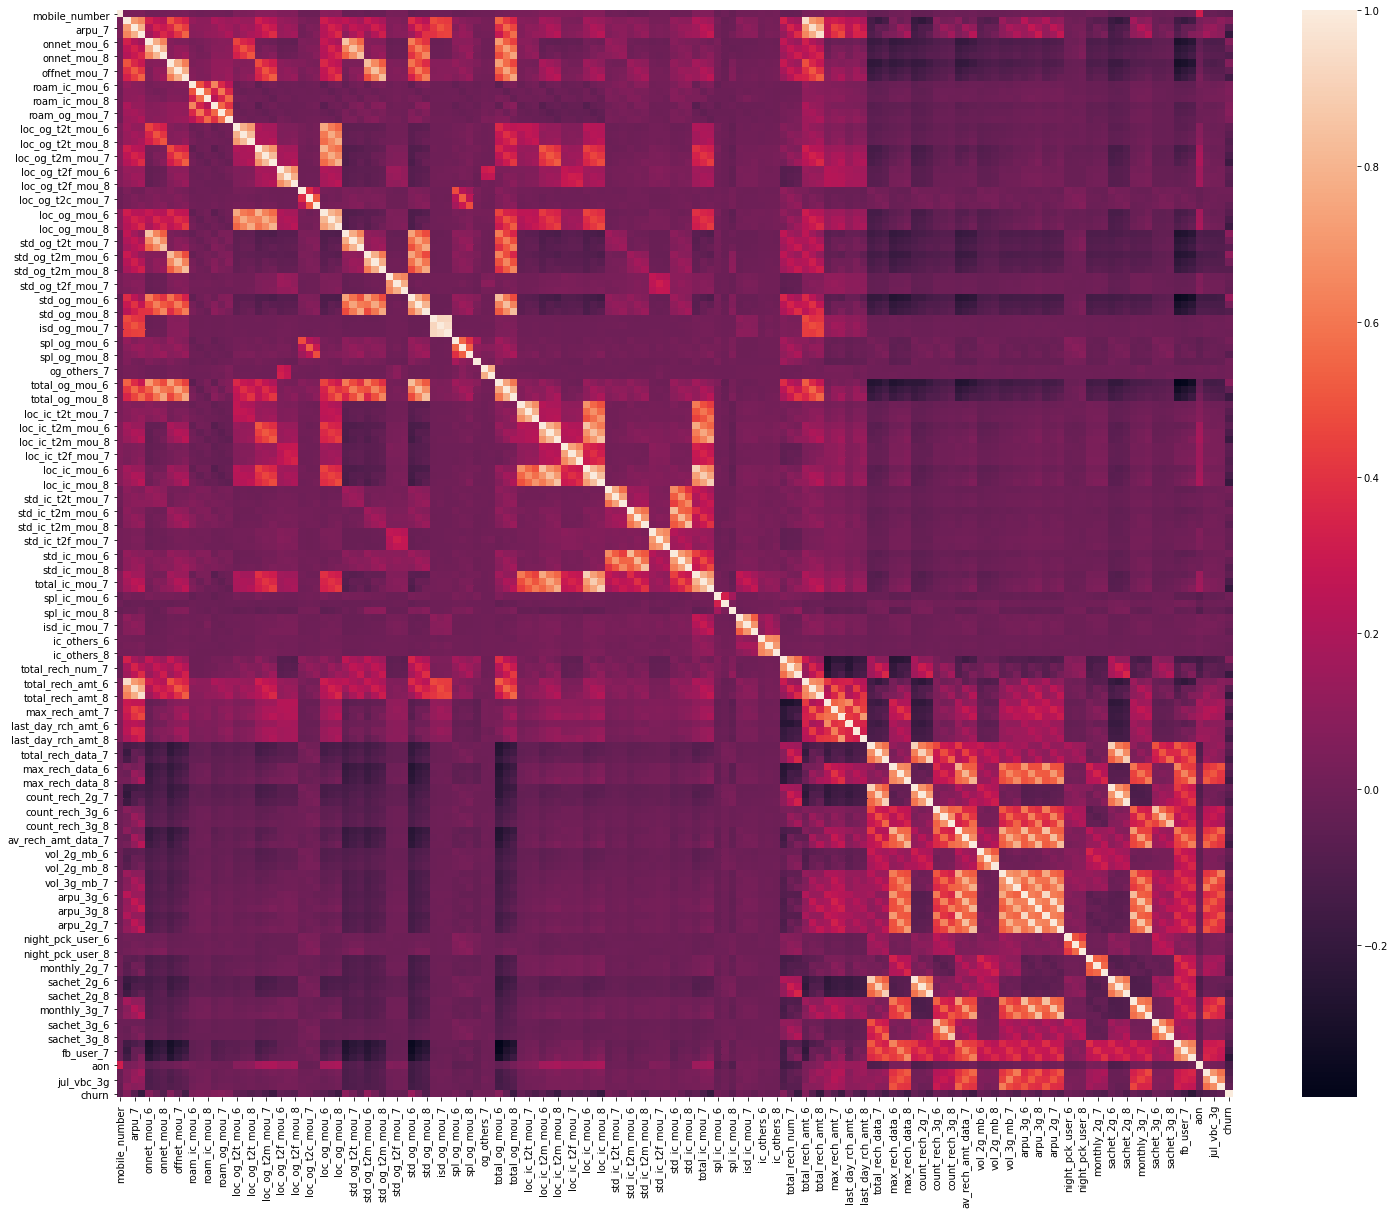

In [52]:
# Print the heat map
plt.figure(figsize = (25, 20))

sns.heatmap(high_value_customers.corr())

plt.show()

In [53]:
len(numeric_cols)

145

In [54]:
high_value_customers["churn"].value_counts()

0    27087
1     2940
Name: churn, dtype: int64

In [55]:
#find the outliers based on quantiles
high_value_customers.describe(percentiles=[0.01,.25,.5,.75,.95, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,3.002700e+04,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,...,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000
mean,7.001203e+09,575.838938,515.550895,473.977702,272.650990,240.529725,212.551931,386.051619,341.436052,305.869113,...,0.220202,0.195990,0.521198,0.495521,0.460552,1203.938156,163.661147,173.793070,158.150095,0.097912
std,6.913524e+05,451.449396,485.179736,498.512184,465.820825,457.845481,434.122694,483.782436,475.228728,450.326020,...,1.083536,1.084267,0.499559,0.499988,0.498450,955.334939,413.746303,439.919562,415.595355,0.297200
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000025e+09,39.321480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,344.415000,252.615000,196.883500,19.190000,12.370000,7.090000,80.830000,54.630000,33.845000,...,0.000000,0.000000,0.000000,0.000000,0.000000,456.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001199e+09,500.090000,429.700000,390.571000,91.360000,69.810000,55.640000,236.490000,188.860000,158.160000,...,0.000000,0.000000,1.000000,0.000000,0.000000,843.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001800e+09,702.271500,662.791500,630.643000,313.295000,249.470000,211.200000,506.325000,442.715000,402.060000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1740.000000,112.800000,121.055000,98.115000,0.000000
95%,7.002285e+09,1239.736100,1232.966100,1222.269300,1153.508000,1081.005000,986.750000,1270.557000,1186.484000,1099.924000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3122.700000,920.363000,975.671000,885.198000,1.000000
99%,7.002385e+09,1984.606700,1981.647260,1945.041760,2158.608000,2126.234000,2073.553200,2325.563800,2253.320200,2062.111200,...,5.000000,4.000000,1.000000,1.000000,1.000000,3651.000000,1934.513800,2047.518800,1945.345400,1.000000


In [56]:
# Handling outliers by replacing the value of data above 99th with 99th quantile values and the 
# ones below 1 with 1 quantile value
for column in high_value_customers.columns:
    if column not in ['mobile_number','churn','aon']:
        quantiles = high_value_customers[column].quantile([0.01,0.99]).values
        high_value_customers[column][high_value_customers[column] <= quantiles[0]] = quantiles[0]
        high_value_customers[column][high_value_customers[column] >= quantiles[1]] = quantiles[1]

In [57]:
high_value_customers.describe(percentiles=[0.01,.25,.5,.75,.95, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,3.002700e+04,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,...,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000,30027.000000
mean,7.001203e+09,566.462439,505.872299,463.961545,263.931943,231.125374,203.717022,378.254615,332.476861,296.723485,...,0.184967,0.150664,0.521198,0.495521,0.460552,1203.938156,155.225567,164.594724,149.213144,0.097912
std,6.913524e+05,346.319652,368.494257,381.294189,410.026521,391.444523,366.854090,435.852558,416.577852,386.663578,...,0.692681,0.591194,0.499559,0.499988,0.498450,955.334939,350.237669,372.119895,346.139195,0.297200
min,7.000000e+09,39.321480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000025e+09,39.330715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,344.415000,252.615000,196.883500,19.190000,12.370000,7.090000,80.830000,54.630000,33.845000,...,0.000000,0.000000,0.000000,0.000000,0.000000,456.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001199e+09,500.090000,429.700000,390.571000,91.360000,69.810000,55.640000,236.490000,188.860000,158.160000,...,0.000000,0.000000,1.000000,0.000000,0.000000,843.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001800e+09,702.271500,662.791500,630.643000,313.295000,249.470000,211.200000,506.325000,442.715000,402.060000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1740.000000,112.800000,121.055000,98.115000,0.000000
95%,7.002285e+09,1239.736100,1232.966100,1222.269300,1153.508000,1081.005000,986.750000,1270.557000,1186.484000,1099.924000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3122.700000,920.363000,975.671000,885.198000,1.000000
99%,7.002385e+09,1984.230558,1981.118352,1944.863982,2158.473320,2125.252760,2072.845168,2325.492612,2253.083548,2061.941888,...,5.000000,4.000000,1.000000,1.000000,1.000000,3651.000000,1934.442612,2047.495712,1945.112596,1.000000


In [58]:
y=high_value_customers['churn']
y.head(10)

0     1
6     0
7     1
8     0
13    0
16    0
17    0
21    0
33    0
41    0
Name: churn, dtype: int64

In [59]:
#Drop the mobile number from analysis as it does not add any value
high_value_customers.drop(['mobile_number'], axis=1, inplace=True)
X = high_value_customers.drop(['churn'],axis=1)



In [60]:
print(list(X.columns))

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [61]:
# Split the data to test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.7, test_size=0.3, random_state=100)
print("Before handling class Imbalance y == 1 is ", sum(y_train==1))
print("Before handling class Imbalance y == 0 is ", sum(y_train==0))

Before handling class Imbalance y == 1 is  2032
Before handling class Imbalance y == 0 is  18986


In [62]:
# Percentage of users who have actually churned
round(len(high_value_customers[high_value_customers.churn == 1])/high_value_customers.shape[0] *100,2)

9.79

The number of customers who have churned are very low. Say less than 10%. Here number of observation from one class is very much lower than the other. Ml Models designed from these data could be biased as these algorithms are designed to reduce error. These type of problems are genrally called as Class Imbalance Problems. SMOTTE is one algorithm to solve the class imbalance problem

In [63]:
#Standardise the input using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Resample to avoid class imbalance
sm = SMOTE(random_state=42)
X_train_resample,y_train_resample = sm.fit_resample(X_train,y_train)

In [65]:
print("After handling class Imbalance y == 1 is ", sum(y_train_resample==1))
print("After handling class Imbalance y == 0 is ", sum(y_train_resample==0))

After handling class Imbalance y == 1 is  18986
After handling class Imbalance y == 0 is  18986


In [66]:
def cumu_variance_graph(var_cumu):
    fig = plt.figure(figsize=[12,8])
    plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
    plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
    plt.plot(var_cumu)
    plt.ylabel("Cumulative variance explained")
    plt.show()

In [67]:
pca = PCA(svd_solver='randomized', random_state=42)

In [68]:
pca.fit(X_train_resample)

PCA(random_state=42, svd_solver='randomized')

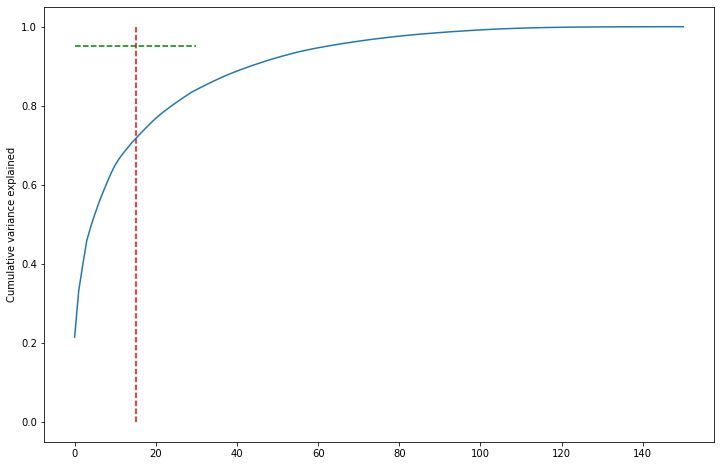

In [69]:
# Draw the line plot based on cumulative variance 
variance_cumulative = np.cumsum(pca.explained_variance_ratio_)
cumu_variance_graph(variance_cumulative)

In [70]:
# From the above we can ifer that 20 componetns can be used to explain 80 percent of variance
pca_final = IncrementalPCA(n_components=20)

In [71]:
X_train_pca = pca_final.fit_transform(X_train_resample)
X_train_pca.shape


(37972, 20)

In [72]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9009, 20)

In [73]:
# Instantiate the logistic regression 
lr0 = LogisticRegression(class_weight='balanced')

In [74]:
# Displays various scores like accuracy, precision, recall, sensitivity and specificity
def confusion_matrix_scores(actual, predicted):                      
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    TP = confusion_matrix[1,1] 
    TN = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    print("Accuracy:", metrics.accuracy_score(actual, predicted))
    print("Precision:", metrics.precision_score(actual, predicted))
    print("Recall:", metrics.recall_score(actual, predicted))
    Total=sum(sum(confusion_matrix))
    sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
    specificity = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    

In [75]:
#Fit the logistic regression
lr0.fit(X_train_pca, y_train_resample)
train_pred_pca = lr0.predict(X_train_pca)
#Predict the probablities 
train_pred_prob_pca = lr0.predict_proba(X_train_pca)[:,1]
#Print the confusion matrix scores
confusion_matrix_scores(y_train_resample, train_pred_pca)


Accuracy: 0.8365901190350785
Precision: 0.8338644793897916
Recall: 0.8406720741599073
Sensitivity: 0.8325081639102496
Specificity: 0.8406720741599073


In [76]:
# Predict the data for the test data set.
test_pred_prob = lr0.predict(X_test_pca)
confusion_matrix_scores(y_test,test_pred_prob)

Accuracy: 0.8367188367188367
Precision: 0.3630170316301703
Recall: 0.8215859030837004
Sensitivity: 0.8384150104925318
Specificity: 0.8215859030837004


In [77]:
# Pick a probablity of 0.5 to classify whether the customer has churned or not
prob_cut_off=0.4
pred_prob_train = lr0.predict_proba(X_train_pca)[:,1]
y_train_df= pd.DataFrame({'churn':y_train_resample, 'churn_Prob':pred_prob_train})
#Classify the values based on the probablities
y_train_df['final_prob'] = y_train_df.churn_Prob.map( lambda x: 1 if x > prob_cut_off else 0)
y_train_df.head()
confusion_matrix_scores(y_train_df["churn"],y_train_df["final_prob"])

Accuracy: 0.828004845675761
Precision: 0.7949604509070242
Recall: 0.884019804066154
Sensitivity: 0.7719898872853682
Specificity: 0.884019804066154


In [78]:
# Find the scores based on the test dataset for the p value of 0.5
pred_prob_test = lr0.predict_proba(X_test_pca)[:,1]
y_test_df= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_prob_test})
y_test_df['final_prob'] = y_test_df.churn_Prob.map( lambda x: 1 if x > prob_cut_off else 0)
y_test_df.head()
confusion_matrix_scores(y_test_df["churn"],y_test_df["final_prob"])

Accuracy: 0.7896547896547896
Precision: 0.30578512396694213
Recall: 0.8557268722466961
Sensitivity: 0.7822491050487594
Specificity: 0.8557268722466961


In [79]:
y_test_df

,churn,churn_Prob,final_prob
1941,0,0.339978,0
57456,0,0.229322,0
69810,0,0.683605,1
32186,0,0.102966,0
28736,0,0.393210,0
...,...,...,...
80329,0,0.017804,0
81788,1,0.884488,1
82392,0,0.413086,1
82021,0,0.809749,1


In [80]:
# Prepare the confusion matrix for the list of probablites and the corresponding accuracy, sensitivity and specificity
probablity_fractions = []
for i in range(0, 10):
    probablity_fractions.append(float(i)/10)

for i in probablity_fractions:
    y_test_df[i]= y_test_df["churn_Prob"].map( lambda x: 1 if x > i else 0)

confusion_matrix_cutoff = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    confusion_matrix = metrics.confusion_matrix( y_test_df.churn, y_test_df[i] )
    Total=sum(sum(confusion_matrix))
    # Calculate Accuracy from Confusion matrix
    accuracy = (confusion_matrix[0,0]+confusion_matrix[1,1])/Total
    # Calculate Sensitivity from Confusion matrix
    sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
    # Calculate Specificity from Confusion matrix
    specificity = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
    confusion_matrix_cutoff.loc[i] =[ i ,accuracy, sensitivity, specificity]
print(confusion_matrix_cutoff)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.100788     0.000000     1.000000
0.1   0.1  0.457875     0.402296     0.953744
0.2   0.2  0.611944     0.577583     0.918502
0.3   0.3  0.715507     0.695963     0.889868
0.4   0.4  0.789655     0.782249     0.855727
0.5   0.5  0.836719     0.838415     0.821586
0.6   0.6  0.869575     0.879521     0.780837
0.7   0.7  0.895105     0.913961     0.726872
0.8   0.8  0.912199     0.945933     0.611233
0.9   0.9  0.911533     0.980743     0.294053


<AxesSubplot:xlabel='prob'>

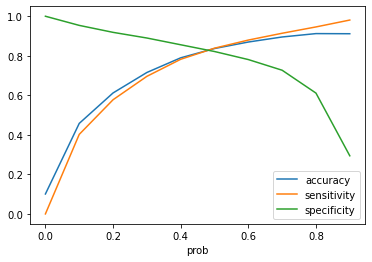

In [81]:
#Plot the confusion matrix and find the intersection of accuracy, sensitivity and specificity.\
# The intersection point is the optimal cutoff.
confusion_matrix_cutoff.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

In [82]:
y_test_df

,churn,churn_Prob,final_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1941,0,0.339978,0,1,1,1,1,0,0,0,0,0,0
57456,0,0.229322,0,1,1,1,0,0,0,0,0,0,0
69810,0,0.683605,1,1,1,1,1,1,1,1,0,0,0
32186,0,0.102966,0,1,1,0,0,0,0,0,0,0,0
28736,0,0.393210,0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80329,0,0.017804,0,1,0,0,0,0,0,0,0,0,0
81788,1,0.884488,1,1,1,1,1,1,1,1,1,1,0
82392,0,0.413086,1,1,1,1,1,1,0,0,0,0,0
82021,0,0.809749,1,1,1,1,1,1,1,1,1,1,0


In [83]:
# Based on the above graph, choosing the cut off value as 0.5
prob_cut_off=0.52
pred_prob_train = lr0.predict_proba(X_train_pca)[:,1]
# Prepare the churn probablity
y_train_df= pd.DataFrame({'churn':y_train_resample, 'churn_Prob':pred_prob_train})
# Prepare the Final probablity of the same
y_train_df['final_prob'] = y_train_df.churn_Prob.map( lambda x: 1 if x > prob_cut_off else 0)
y_train_df.head()
#Prepare the confusion matrix and print Print the approproate scores from it.
confusion_matrix_scores(y_train_df.churn,y_train_df.final_prob)


Accuracy: 0.8372221636995681
Precision: 0.8409030403066929
Recall: 0.8318234488570526
Sensitivity: 0.8426208785420837
Specificity: 0.8318234488570526


In [84]:
# Estimating the scores of the test dataset based on 0.5
pred_prob_test = lr0.predict_proba(X_test_pca)[:,1]
y_test_df= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_prob_test})
y_test_df['final_prob'] = y_test_df.churn_Prob.map( lambda x: 1 if x > prob_cut_off else 0)
y_test_df.head()
confusion_matrix_scores(y_test_df["churn"],y_test_df["final_prob"])

Accuracy: 0.8452658452658453
Precision: 0.37652439024390244
Recall: 0.816079295154185
Sensitivity: 0.8485372176274534
Specificity: 0.816079295154185


#### End of Logistic Regression with PCA

In [85]:
def confusion_matrix_prep(y_test_df):
    probablity_fractions = []
    for i in range(0, 10):
        probablity_fractions.append(float(i)/10)

    for i in probablity_fractions:
        y_test_df[i]= y_test_df["churn_Prob"].map( lambda x: 1 if x > i else 0)

    confusion_matrix_cutoff = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        confusion_matrix = metrics.confusion_matrix( y_test_df.churn, y_test_df[i] )
        Total=sum(sum(confusion_matrix))
        accuracy = (confusion_matrix[0,0]+confusion_matrix[1,1])/Total
        sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
        specificity = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
        confusion_matrix_cutoff.loc[i] =[ i ,accuracy, sensitivity, specificity]
    return confusion_matrix_cutoff

In [86]:
def predict_churn(model,X,y, p):
    pred_probs = model.predict_proba(X)[:,1]
    result= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    result['final_prob'] = result.churn_Prob.map( lambda x: 1 if x > p else 0)
    confusion_matrix_scores(result.churn, result.final_prob)
    return result

In [87]:
# Creating the decision tree classifier object
decision_tree = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=5,
                             random_state=10)
decision_tree.fit(X_train_pca, y_train_resample)
#Fit the training set
decision_tree_predictions_pca = decision_tree.predict(X_train_pca)
# Predict the probablities oin the Test data set
decision_tree_pred_prob = decision_tree.predict_proba(X_train_pca)[:,1]
# Predict the Test data set
decision_tree_pred_probs_test = decision_tree.predict(X_test_pca)


In [88]:
# Perform a Grid search on the decision tree classifier algorithm
param_grid = {
    'max_depth': range(4, 6, 8),
    'min_samples_leaf': range(50, 100, 250),
    'min_samples_split': range(250, 500),
    'max_features': [10, 15, 25]
}

dt_classifier = DecisionTreeClassifier(class_weight='balanced',random_state=10)
grid_search = GridSearchCV(estimator = dt_classifier, param_grid = param_grid, 
                           cv = 4, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [89]:

grid_search.fit(X_train_pca, y_train_resample)

Fitting 4 folds for each of 750 candidates, totalling 3000 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(4, 6, 8),
                         'max_features': [10, 15, 25],
                         'min_samples_leaf': range(50, 100, 250),
                         'min_samples_split': range(250, 500)},
             scoring='f1_weighted', verbose=1)

In [90]:
#Find the best parameters of Grid search Decision tree classifier
print("Best Parameters" , grid_search.best_params_)
print("Best Score" , grid_search.best_score_)

Best Parameters {'max_depth': 4, 'max_features': 15, 'min_samples_leaf': 50, 'min_samples_split': 455}
Best Score 0.8029500312342869


In [91]:
# Construct the decision tree based on the best parameters received above
decision_tree_best = DecisionTreeClassifier(class_weight='balanced',
                             max_features=15,
                             min_samples_split=250,
                             min_samples_leaf=50,
                             max_depth=4,
                             random_state=10)
decision_tree_best.fit(X_train_pca, y_train_resample)
decision_tree_best_predictions_pca = decision_tree_best.predict(X_train_pca)
decision_tree_best_pred_prob = decision_tree_best.predict_proba(X_train_pca)[:,1]
decision_tree_pred_probs_test = decision_tree_best.predict(X_test_pca)
print("-------- Training Set Scores ---------")
confusion_matrix_scores(y_train_resample, decision_tree_best_predictions_pca)
print("-------- Test Set Scores ---------")
confusion_matrix_scores(y_test, decision_tree_pred_probs_test)

-------- Training Set Scores ---------
Accuracy: 0.80451385231223
Precision: 0.8555002152124455
Recall: 0.7328031180870115
Sensitivity: 0.8762245865374486
Specificity: 0.7328031180870115
-------- Test Set Scores ---------
Accuracy: 0.8558108558108558
Precision: 0.38187311178247735
Recall: 0.6960352422907489
Sensitivity: 0.8737192939143316
Specificity: 0.6960352422907489


In [92]:
# Predict the train and test dataset based on the random priobablity value of 0.4
print("-------- Training Set Scores ---------")
y_train_decision_tree_withcutoff = predict_churn(decision_tree_best,X_train_pca,y_train_resample,0.4)
print("-------- Test Set Scores ---------")
y_test_decision_tree_withcutoff  = predict_churn(decision_tree_best,X_test_pca,y_test,0.4)

-------- Training Set Scores ---------
Accuracy: 0.7917939534393764
Precision: 0.7593147350683392
Recall: 0.8544190456125567
Sensitivity: 0.7291688612661962
Specificity: 0.8544190456125567
-------- Test Set Scores ---------
Accuracy: 0.737040737040737
Precision: 0.251446070091868
Recall: 0.8138766519823789
Sensitivity: 0.7284285890630786
Specificity: 0.8138766519823789


In [93]:
result = confusion_matrix_prep(y_test_decision_tree_withcutoff)

In [94]:
result

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.100788,0.000000,1.000000
0.1,0.1,0.100788,0.000000,1.000000
0.2,0.2,0.595738,0.561782,0.898678
0.3,0.3,0.695083,0.677077,0.855727
0.4,0.4,0.737041,0.728429,0.813877
0.5,0.5,0.855811,0.873719,0.696035
0.6,0.6,0.855811,0.873719,0.696035
0.7,0.7,0.875680,0.901247,0.647577
0.8,0.8,0.875680,0.901247,0.647577
0.9,0.9,0.899212,1.000000,0.000000


<AxesSubplot:xlabel='prob'>

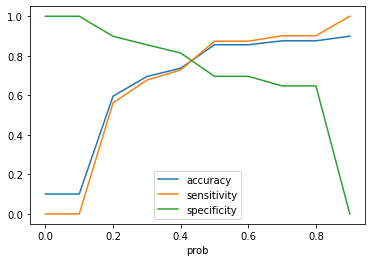

In [95]:
# Plot the data between 'accuracy','sensitivity','specificity' and find the intersection point as the best cutoff point
result.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

In [96]:
print("-------- Training Set Scores ---------")
y_train_decision_tree_withcutoff = predict_churn(decision_tree_best,X_train_pca,y_train_resample,0.42)
print("-------- Testing Set Scores ---------")
y_test_decision_tree_withcutoff  = predict_churn(decision_tree_best,X_test_pca,y_test,0.42)

-------- Training Set Scores ---------
Accuracy: 0.7979037185294428
Precision: 0.7801941939958387
Recall: 0.8295059517539239
Sensitivity: 0.7663014853049616
Specificity: 0.8295059517539239
-------- Testing Set Scores ---------
Accuracy: 0.7661227661227661
Precision: 0.2716190476190476
Recall: 0.7852422907488987
Sensitivity: 0.7639797555857302
Specificity: 0.7852422907488987


#### End of Decision Tree

#### Random Forests

In [97]:
#Create a randomforest classifier instance
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

#Prepare the list of parameters to perform the grid search
param_grid = {
    'max_depth': range(4, 6, 2),
    'min_samples_leaf': range(50, 100, 250),
    'n_estimators':range(20,50, 25)
}

#Instantiate the GridSearchCV object with the parameters.
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
#Fit the Training dataset in grid Search
grid_search.fit(X_train_pca, y_train_resample)
#Print the best score
grid_search.best_score_

Fitting 4 folds for each of 2 candidates, totalling 8 fits


0.814336879806173

In [98]:
#Print the best parameters that has fit the best from the Grid search
print("Best Parameters" , grid_search.best_params_)

Best Parameters {'max_depth': 4, 'min_samples_leaf': 50, 'n_estimators': 45}


In [99]:
#Apply the best fit parameters to the random forest classifier.
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=4, min_samples_leaf =50, n_estimators = 45)

In [100]:
#Fit the training data set to the training dataset
random_forest.fit(X_train_pca,y_train_resample)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, n_estimators=45,
                       n_jobs=-1, random_state=42)

In [101]:
#Predict the training dataset using RF classifier
random_forest_best_predictions_pca = random_forest.predict(X_train_pca)
#Predict the Probablity using training dataset using RF classifier
random_forest_best_pred_prob = random_forest.predict_proba(X_train_pca)[:,1]
#Predict the Probablity using testing dataset using RF classifier
random_forest_pred_probs_test = random_forest.predict(X_test_pca)
print("-------- Training Set Scores ---------")
confusion_matrix_scores(y_train_resample, random_forest_best_predictions_pca)
print("-------- Test Set Scores ---------")
confusion_matrix_scores(y_test, random_forest_pred_probs_test)

-------- Training Set Scores ---------
Accuracy: 0.8189982092067839
Precision: 0.8265135586824087
Recall: 0.807489729274202
Sensitivity: 0.8305066891393659
Specificity: 0.807489729274202
-------- Test Set Scores ---------
Accuracy: 0.8229548229548229
Precision: 0.33540967896502155
Recall: 0.7709251101321586
Sensitivity: 0.8287865695593136
Specificity: 0.7709251101321586


In [102]:
# Classifyng based on a cutoff of proabblity as 0.4
print("-------- Training Set Scores ---------")
y_train_random_forest_withcutoff = predict_churn(random_forest,X_train_pca,y_train_resample,0.4)
print("-------- Test Set Scores ---------")
y_test_random_forest_withcutoff  = predict_churn(random_forest,X_test_pca,y_test,0.4)

-------- Training Set Scores ---------
Accuracy: 0.8014589697671969
Precision: 0.7576412334008553
Recall: 0.886495312335405
Sensitivity: 0.7164226271989887
Specificity: 0.886495312335405
-------- Test Set Scores ---------
Accuracy: 0.7217227217227217
Precision: 0.24755288916956109
Recall: 0.8634361233480177
Sensitivity: 0.7058387853351438
Specificity: 0.8634361233480177


In [103]:
result = confusion_matrix_prep(y_test_random_forest_withcutoff)

<AxesSubplot:xlabel='prob'>

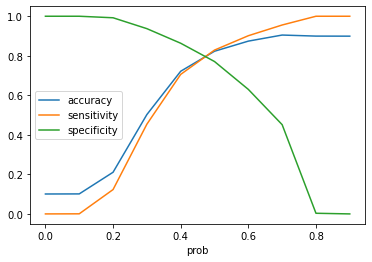

In [104]:
# Draw the plot based on accuract, sensitivity and specificity and find the interection points.
result.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

In [105]:
#The intersection point is used to predict the scores again for the training and trst datsets.
print("-------- Training Set Scores ---------")
y_train_random_forest_withcutoff = predict_churn(random_forest,X_train_pca,y_train_resample,0.45)
print("-------- Test Set Scores ---------")
y_test_random_forest_withcutoff  = predict_churn(random_forest,X_test_pca,y_test,0.45)

-------- Training Set Scores ---------
Accuracy: 0.8118350363425683
Precision: 0.791635880005911
Recall: 0.8464658169177288
Sensitivity: 0.7772042557674076
Specificity: 0.8464658169177288
-------- Test Set Scores ---------
Accuracy: 0.7797757797757797
Precision: 0.28967943706020327
Recall: 0.816079295154185
Sensitivity: 0.7757067028761881
Specificity: 0.816079295154185


### XGBoost

In [106]:
#Instantiate XGBoost classifier
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

In [107]:
params = {
        'n_estimators' : [20, 40, 60], # no of trees 
        'learning_rate' : [0.01, 0.1],  # eta
        'min_child_weight': [ 5, 7],
        'gamma': [ 1, 0.5, 0.1],
        'subsample': [0.8, 1.0, 0.6],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6, 8]
        }


In [108]:
# Perform random search based on the parameters with 5 folds
folds = 5

param_comb = 10

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)


In [109]:
#Fit the datset based on random search + XGB
random_search.fit(X_train_pca, y_train_resample)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[11:57:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [110]:
print('Best estimator:', random_search.best_estimator_)
print('Best score for XG Boost is ', random_search.best_score_ )
print('Best hyperparameters:', random_search.best_params_)


Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=60, n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)
Best score for XG Boost is  0.9031657784644438
Best hyperparameters: {'subsample': 1.0, 'n_estimators': 60, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}


In [111]:
# Applying the best hyper parameters to the XGB classifier
xgb = XGBClassifier(learning_rate =0.1,
                    n_estimators=60,
                    max_depth=8,
                    min_child_weight=5,
                    gamma=1,
                    subsample=1.0,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4)

In [112]:
#Fit the training data based on the best hyper parameters
xgb.fit(X_train_pca, y_train_resample)
xgb_predictions_pca = xgb.predict(X_train_pca)
#Predict the probablity for the tarining set
xgb_pred_prob = xgb.predict_proba(X_train_pca)[:,1]
#Predict the probablity for the test set
xgb_pred_probs_test = xgb.predict(X_test_pca)
print("-------- Training Set Scores ---------")
confusion_matrix_scores(y_train_resample, xgb_predictions_pca)
print("-------- Testing Set Scores ---------")
confusion_matrix_scores(y_test, xgb_pred_probs_test)

[11:57:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------- Training Set Scores ---------
Accuracy: 0.9374275782155272
Precision: 0.921916277179435
Recall: 0.9558095438744338
Sensitivity: 0.9190456125566207
Specificity: 0.9558095438744338
-------- Testing Set Scores ---------
Accuracy: 0.8783438783438784
Precision: 0.4386422976501306
Recall: 0.7400881057268722
Sensitivity: 0.8938402666337489
Specificity: 0.7400881057268722


In [113]:
#  Assume the base probablity to 0.4 and predict the scores for train and test dataset 
print("-------- Training Set Scores ---------")
y_train_xgb_withcutoff = predict_churn(xgb,X_train_pca,y_train_resample,0.4)
print("-------- Test Set Scores ---------")
y_test_xgb_withcutoff  = predict_churn(xgb,X_test_pca,y_test,0.4)

-------- Training Set Scores ---------
Accuracy: 0.9339513325608343
Precision: 0.9003790455826611
Recall: 0.9758769619719794
Sensitivity: 0.8920257031496892
Specificity: 0.9758769619719794
-------- Test Set Scores ---------
Accuracy: 0.8559218559218559
Precision: 0.39178690344062156
Recall: 0.7775330396475771
Sensitivity: 0.8647080607332428
Specificity: 0.7775330396475771


In [114]:
# Prepare the confusion matrix
result = confusion_matrix_prep(y_test_xgb_withcutoff)

In [115]:
result


,prob,accuracy,sensitivity,specificity
0.0,0.0,0.100788,0.000000,1.000000
0.1,0.1,0.615829,0.581410,0.922907
0.2,0.2,0.758464,0.746574,0.864537
0.3,0.3,0.817849,0.818047,0.816079
0.4,0.4,0.855922,0.864708,0.777533
0.5,0.5,0.878344,0.893840,0.740088
0.6,0.6,0.896770,0.918405,0.703744
0.7,0.7,0.907315,0.936921,0.643172
0.8,0.8,0.917527,0.957413,0.561674
0.9,0.9,0.919636,0.982842,0.355727


<AxesSubplot:xlabel='prob'>

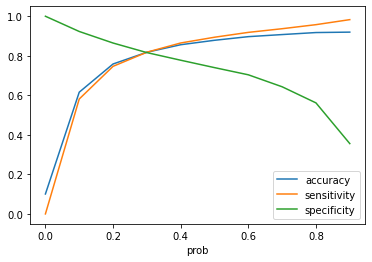

In [116]:
# Plot the accuracy, sensitivity and specificity and find the intersection point.
result.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

In [117]:
# The best optimal cutoff from the above plot is 0.3. 
# Now using the cutoff to predict the values in Test and training set
print("-------- Training Set Scores ---------")
y_train_xgb_withcutoff = predict_churn(xgb,X_train_pca,y_train_resample,0.3)
print("-------- Test Set Scores ---------")
y_test_xgb_withcutoff  = predict_churn(xgb,X_test_pca,y_test,0.3)

-------- Training Set Scores ---------
Accuracy: 0.9206783946065522
Precision: 0.8707640887568471
Recall: 0.9879911513746972
Sensitivity: 0.8533656378384072
Specificity: 0.9879911513746972
-------- Test Set Scores ---------
Accuracy: 0.8178488178488178
Precision: 0.3345372460496614
Recall: 0.816079295154185
Sensitivity: 0.8180471546722626
Specificity: 0.816079295154185


### Logistic regression

The following are the values for Logistic regression Tree classifier after hyperparameter tuning:
-    #### Training dataset

           - Accuracy: 0.8410407668808596
           - Precision: 0.8458498023715415
           - Recall: 0.8340882755714737
           - Sensitivity: 0.8479932581902454
           - Specificity: 0.8340882755714737

-    #### Test dataset 

          - Accuracy: 0.8512598512598513
          - Precision: 0.3892307692307692
          - Recall: 0.8359030837004405
          - Sensitivity: 0.8529811134427848
          - Specificity: 0.8359030837004405

### Decision Tree classifier

The following are the values for Decision Tree classifier after hyperparameter tuning:
#### Training Set Scores 
    - Accuracy: 0.7979037185294428
    - Precision: 0.7801941939958387
    - Recall: 0.8295059517539239
    - Sensitivity: 0.7663014853049616
    - Specificity: 0.8295059517539239
#### Testing Set Scores 
    - Accuracy: 0.7661227661227661
    - Precision: 0.2716190476190476
    - Recall: 0.7852422907488987
    - Sensitivity: 0.7639797555857302
    - Specificity: 0.7852422907488987

### Random Forest Classifier

The following are the values for Random forest classifier after hyperparameter tuning:

#### Training Set Scores 
    - Accuracy: 0.8118350363425683
    - Precision: 0.791635880005911
    - Recall: 0.8464658169177288
    - Sensitivity: 0.7772042557674076
    - Specificity: 0.8464658169177288
#### Testing Set Scores 
    - Accuracy: 0.7797757797757797
    - Precision: 0.28967943706020327
    - Recall: 0.816079295154185
    - Sensitivity: 0.7757067028761881
    - Specificity: 0.816079295154185

### XG boost Classifier

The following are the values for XG Boost classifier after hyperparameter tuning:
##### Training Set Scores 
    - Accuracy: 0.9206783946065522
    - Precision: 0.8707640887568471
    - Recall: 0.9879911513746972
    - Sensitivity: 0.8533656378384072
    - Specificity: 0.9879911513746972
#### Test Set Scores 
    - Accuracy: 0.8178488178488178
    - Precision: 0.3345372460496614
    - Recall: 0.816079295154185
    - Sensitivity: 0.8180471546722626
    - Specificity: 0.816079295154185
  


### Even though the XG boost gives a similar accuracy and sensitivity levels like logistic regression its important to know that the model in the XG boost is overfitted as there is a 10 point difference between Test and training accuracy.
### Logistic regression with PCA with 85% accuracy and senstivity makes the best model.


In [118]:
### Findning the top 10 features based on the importance
### We will use random forest classifier to find the features

In [119]:
#Creating the random forest object based on the best params received above
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=4, min_samples_leaf =50, n_estimators = 45)

In [120]:
# Fitting the trainig data
rf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [121]:
# Create a Panda series to have feature importances and the column names
features = pd.Series(rf.feature_importances_, index=X.columns)
features = features.reset_index()
#rename the index to feature name
features.rename(columns = {'index':'feature_name'}, inplace = True)

In [122]:
#rename the column 0 to score
features.rename(columns = {0:'score'}, inplace = True)

In [123]:
# Sort the values based on score in descending order
features.sort_values('score', ascending= False)

,feature_name,score
80,total_ic_mou_8,0.058030
65,loc_ic_mou_8,0.053015
2,arpu_8,0.049988
59,loc_ic_t2m_mou_8,0.049355
95,total_rech_amt_8,0.038530
14,roam_og_mou_8,0.037667
11,roam_ic_mou_8,0.033064
98,max_rech_amt_8,0.030702
29,loc_og_mou_8,0.029781
56,loc_ic_t2t_mou_8,0.029346


### The top 6 features that impact the churn are as follows

The top 6 features based on random forests are as follows:
  - last_day_rch_amt_8
  - loc_ic_mou_8
  - loc_ic_t2m_mou_8
  - total_ic_mou_8
  - loc_ic_t2t_mou_8
  - roam_og_mou_8

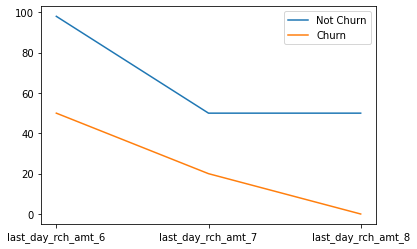

churn,0,1
last_day_rch_amt_6,98,50
last_day_rch_amt_7,50,20
last_day_rch_amt_8,50,0


In [124]:
# Find the pattern based on last da recharge amount
last_day_df = high_value_customers.groupby(['churn'])["last_day_rch_amt_6","last_day_rch_amt_7","last_day_rch_amt_8"].median().T
plt.plot(last_day_df)
plt.legend(['Not Churn', 'Churn'])
plt.show()
last_day_df

Inference: 
- The last day recharge amount reduces drastically for the churn customers as the month progresses to 8

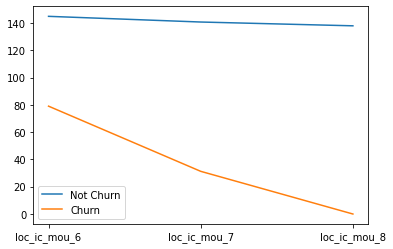

churn,0,1
loc_ic_mou_6,144.98,79.1
loc_ic_mou_7,140.81,31.3
loc_ic_mou_8,138.03,0.0


In [125]:
# Find the pattern based on local incoming minutes
loc_ic_df = high_value_customers.groupby(['churn'])["loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8"].median().T
plt.plot(loc_ic_df)
plt.legend(['Not Churn', 'Churn'])
plt.show()
loc_ic_df

Inference: 
 - The local incoming minutes for the customers is very low for the churned customers. 
 - We need to identify the reasons for it and try to address it

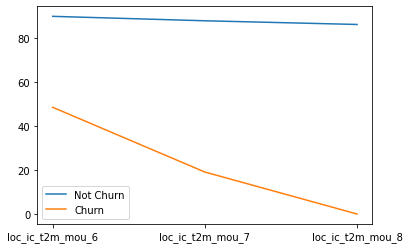

churn,0,1
loc_ic_t2m_mou_6,89.96,48.565
loc_ic_t2m_mou_7,87.94,19.100
loc_ic_t2m_mou_8,86.26,0.000


In [126]:
# Find the pattern based on local incoming minutes from another operator
loc_ic_t2m_df = high_value_customers.groupby(['churn'])["loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_t2m_mou_8"].median().T
plt.plot(loc_ic_t2m_df)
plt.legend(['Not Churn', 'Churn'])
plt.show()
loc_ic_t2m_df

Inference: 
 - The local incoming calls to another operator drops drastically between 6 and 7 is an indication of the customer is churning

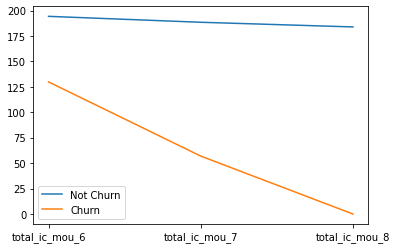

churn,0,1
total_ic_mou_6,194.34,129.885
total_ic_mou_7,188.51,56.960
total_ic_mou_8,183.93,0.000


In [127]:
# Finding the pattern based on total incoming minutes of usage
total_ic_mou_df = high_value_customers.groupby(['churn'])["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"].median().T
plt.plot(total_ic_mou_df)
plt.legend(['Not Churn', 'Churn'])
plt.show()
total_ic_mou_df

Inference: 
- Total incoming minutes of usage drops among these users as the month progresses and it reaches 0 in the month of 8.
- So better to keep a check on 7th month and prevent the churn

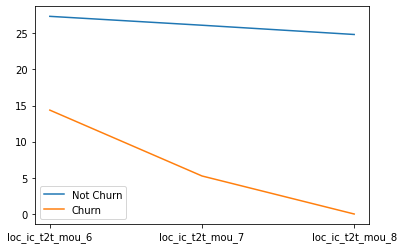

churn,0,1
loc_ic_t2t_mou_6,27.34,14.37
loc_ic_t2t_mou_7,26.11,5.26
loc_ic_t2t_mou_8,24.83,0.00


In [128]:
#Finding the pattern with the local incoming call from the same operator
loc_ic_t2t_mou_8_df = high_value_customers.groupby(['churn'])["loc_ic_t2t_mou_6","loc_ic_t2t_mou_7","loc_ic_t2t_mou_8"].median().T
plt.plot(loc_ic_t2t_mou_8_df)
plt.legend(['Not Churn', 'Churn'])
plt.show()
loc_ic_t2t_mou_8_df

Inference: 
- Local incoming calls from the same operator decreses drastically. 
- Hence its better to target these customers in the month of 7 when it reduces

#### Recommendations:
   - The recharge amount in the month 8 is one of the predominant factors in determining whether a customer will churn or not.
   - If the recharge amount in the month 8 is low, the company should try rolling out offers for them.
   - We see that incoming calls suddenly spiking before the churn happens.
   - If the ARPU drops in the month of 7 , there are more chances of the user churning.
   - If the average incoming calls is very high, there is more likelihood of the customer churning
   - The last day recharge amount is low in the month of 7 for the customer who churned. Its better to roll out some offers to them before they churn.
   - Target customers whose activity has reduced in the month of 7 based on parameters like loc_ic_t2t_mou, loc_ic_t2t_mou, total_ic_mou, loc_ic andlast_day_rch_amt. Target these customers early by rolling out some offers or other incentives before they decide to leave the network.